<img style="float: right;" src="logo.png" width="500">


# Análisis de Regresión (2020-4)
## Especialización en Estadística Aplicada
#### Prof. [Sébastien Lozano Forero](https://www.linkedin.com/in/sebastienlozanoforero/) (slozanof@libertadores.edu.co)

## <font color='red'>Introducción a la Regresión Logística</font>

### Tabla de contenidos

* [Modelo de Regresión Logística](#modelo)
* [Resultados Generales](#resultados)
* [Supuestos](#supuestos)
* [Validación de Supuestos](#validacion) 
* [Ejemplo](#ejemplo)

### Modelo de Regresión Logística <a class="anchor" id="modelo"></a>

Suponga alguna de las siguientes situaciones 
- Un sujeto operado se infecta o no durante cierto lapso post-operatorio.
- Un bebé nace con o sin malformación congénita.
- Un paciente hospitalizado muere o no antes del alta.
- A los tres meses de vida, un niño ha dejado de lactar o aún se mantiene alimentándose con leche materna.
- Un año después de una intervención quirúrgica, se ha resuelto o no el problema que la origino´.
- Después de un tratamiento de quimioterapia en un paciente con cáncer de pulmón se observa alguno de los siguientes resultados sobre la enfermedad:  aumento, no cambio, remisión parcial, remisión completa.



El modelo de regresión lineal tradicional utiliza la linealidad para describir la relación entre el valor esperado de la variable respuesta y un conjunto de variables explicativas asumiendo que la distribución de la variable respuesta es normal.
Los modelos lineales generalizados (MLG) extiende el modelo de regresión lineal tradicional con el fin de poder caracterizar variables respuestas con distribuciones no normales y funciones no lineales de la media. Los MLG tienen tres componentes:

    1. Componente aleatorio: 
Este componente especifica la variable de respuesta $y$ y su distribución de probabilidad. 

Nota 1: La distribución de la variable respuesta debe ser un miembro de la familia exponencial de distribuciones. 
Se dice que una distribución con densidad de probabilidad o función de masa para una variable aleatoria $y$ pertenece a la familia exponencial de distribuciones sí, y solo sí, puede expresarse de la forma general dada por: 
$$
f(y;\theta,\phi)=\text{exp}\left[\frac{y\theta−b(\theta)}{a(\phi)} +c(y,\phi)\right]
$$
donde

- $\theta$ es llamado el parámetro natural o canónico y representa la localización.

- $\phi$ es llamado el parámetro de dispersión y representa la escala. 

- $b(\theta)$ se define como la función cumulante y es importante porque relaciona el parámetro canónico con la media y varianza de $y$. 

Nota 2: Las observaciones sobre esa distribución $y=(y_1,y_2,\cdots,y_n)^\top$   se consideran independientes. 

A continuación, los principales elementos para tres de las distribuciones que pueden modelarse con GLMs

|                 | Regresión Lineal | Regresión Poisson | Regresión Logística |
|------------------------|------------------------|-------------------------|---------------------------|
| $Y \mid {\bf X} = {\bf x}$ | $N(\mu({\bf x}), \sigma^2)$    | $\text{Pois}(\lambda({\bf x}))$          | $\text{Bern}(p({\bf x}))$                                              |
| **Nombre de la Distribución**                           | Normal                         | Poisson                                  | Bernoulli (Binomial)                                                   |
| $\text{E}[Y \mid {\bf X} = {\bf x}]$            | $\mu({\bf x})$                 | $\lambda({\bf x})$                       | $p({\bf x})$                                                           |
| **Soporte**                                     | Real: $(-\infty, \infty)$      | Entero: $0, 1, 2, \ldots$               | Entero: $0, 1$                                                        |
| **Uso**                                       | Data Numérica                 | Data de Conteo (Entero)                     |Data binaria                                      |
| **Nombre la ligación**                                   | Identity                       | Log                                      | Logit                                                                  |
| **Link Function** | $\eta({\bf x}) = \mu({\bf x})$ | $\eta({\bf x}) = \log(\lambda({\bf x}))$ | $\eta({\bf x}) = \log \left(\frac{p({\bf x})}{1 - p({\bf x})} \right)$          |
| **Mean Function**                               | $\mu({\bf x}) = \eta({\bf x})$ | $\lambda({\bf x}) = e^{\eta({\bf x})}$   | $p({\bf x})= \frac{1}{1 + e^{-\eta({\bf x})}}$ |

    2. Componente sistemático o predictor lineal:

El componente sistemático o predictor lineal es una combinación lineal del conjunto de p covariables identificadas por el analista que asocia el efecto estas variables auxiliares sobre la media de la variable respuesta.

Para un vector de parámetros $\beta=(\beta_1,\beta_2,\cdots, \beta_p )^\top$ desconocidos (a ser estimados posteriormente) y una matriz de información $X$ que contiene todos los $n$  (Nota: $p<n$) valores observados de un conjunto de $p$ variables explicativas, el predictor lineal tiene la forma $X\beta$.

<img style="float: right;" src="logi.png" width="500">

La recta de regresión de un modelo de regresión lineal  se extiende de forma ilimitada entre $(-\infty, \infty)$.
Si bien los valores de la recta de regresión se interpretan en el rango de valores de $x$ observados en la muestra y tienen un sentido interpretativo, descartando valores de predicción imposibles a partir de los datos estudiados. No obstante, también puede suceder que a pesar de considerar el rango de valores de la muestra los valores pronosticados sean
valores imposibles. Es el caso que se puede dar cuando consideramos en la regresión lineal variables dicotómicas de la variable dependiente, codificadas con 0 y 1, donde los valores predichos pueden ser inferiores a 0 y superiores a 1, fuera del rango definido por la variable dependiente. La regresión logística resuelve este tipo de problema usando una función no lineal como es la función logística. Con esta función se pueden efectuar predicciones comprendidas entre un mínimo y un máximo. El modelo de regresión logística es un modelo no lineal que utiliza el método de máxima verosimilitud, un procedimiento iterativo que en fases sucesivas ajusta el modelo.

En últimas, este problema del "idioma" que hablan los componentes sistemático y aleatorio se resuelve con     

    3. Una función de enlace

En una función g que aplicada a cada componente de $E(y)$ lo relaciona con el predictor lineal, es decir, $g(E(y))= X\beta$. Usualmente se denota con el símbolo $\eta$.

En otras palabras, la función de enlace es una transformación de la media de la variable respuesta de modo que los efectos de las covariables sean aditivos y las restricciones sobre los datos se mantengan




De esta manera, se la función sigmoide (sigmoid function) es útil para poder "traducir" la información de un componente a otro. Es decir, es una excelente opción (ojo, no es la única) a ser una función de ligación  $$f(x)= \frac{1}{1+e^{-x}}$$

Así, el **modelo de regresión logística** se gesta del interés de poder predecir el comportamiento de las variables $y_1, \cdots, y_n\sim Br(p)$, con 

\begin{cases}
p = P(y_t=1), t =1, 2\cdots, n.\\
1-p = P(y_t=0), t =1, 2\cdots, n.,
\end{cases}

a partir del conocimiento consignado en las variables exógenas. De esta manera, el modelo está dado por 
$$
p= P(y_t|x_1, \cdots, x_p)=\frac{1}{1+\exp(-\beta_0 -\beta_1x_1-\beta_2x_2-\cdots-\beta_px_p)}
$$
o de forma equivalente, como 
$$
\log\left(\frac{p}{1-p}\right)= \log\left(\frac{P(y_t|x_1, \cdots, x_p)}{1-P(y_t|x_1, \cdots, x_p)}\right)=\beta_0 +\beta_1x_1+\beta_2x_2+\cdots+\beta_px_p
$$




Donde: 
- $\beta_0, \beta_1, \cdots, \beta_p$ son parámetros poblacionales a ser estimados.
- $y$ representa la *variable respuesta*
- $x_1,\cdots x_p$ representan las *variables predictoras*


In [ ]:
library(tidyverse)
library(ISLR)
datos <- Default

# Se recodifican los niveles No, Yes a 1 y 0
datos <- datos %>%
         select(default, balance) %>%
         mutate(default = recode(default,
                                 "No"  = 0,
                                 "Yes" = 1))
head(datos)

In [ ]:
# Ajuste de un modelo lineal por mínimos cuadrados.
modelo_lineal <- lm(default ~ balance, data = datos)

# Representación gráfica del modelo.
ggplot(data = datos, aes(x = balance, y = default)) +
  geom_point(aes(color = as.factor(default)), shape = 1) + 
  geom_smooth(method = "lm", color = "gray20", se = FALSE) +
  theme_bw()  +
  labs(title = "Regresión lineal por mínimos cuadrados",
       y = "Probabilidad default") +
  theme(legend.position = "none")

y peor aún, para predecir:  

In [ ]:
predict(object = modelo_lineal, newdata = data.frame(balance = 10000))

### Resultados Generales <a class="anchor" id="resultados"></a>

### Proceso de estimación de parámetros

Podemos escribir el modelo de regresión muestral correspondiente al modelo como
$$
\log\left(\frac{p}{1-p}\right)= \log\left(\frac{P(y_t|x_1, \cdots, x_p)}{1-P(y_t|x_1, \cdots, x_p)}\right)=\beta_0 +\beta_1x_1+\beta_2x_2+\cdots+\beta_px_p
$$

	
En notación matricial, este modelo de regresión muestral se representa como
$$
\log\left(\frac{p}{1-p}\right)= \log\left(\frac{P(Y|X)}{1-P(Y|X)}\right)=X\beta
$$
donde
$$
\begin{array}{ccc}
\mathbf{Y}=\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}, & \mathbf{X}=\begin{pmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1p} \\
1 & x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \vdots & & \vdots \\
1 & x_{n1} & x_{n2} & \cdots & x_{np} \\
\end{pmatrix}, 
\mathbf{\beta}=\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_p
\end{pmatrix}
\end{array}
$$

Deseamos encontrar el vector de estimadores de mínimos cuadrados, $\mathbf{\beta}$, que minimiza la función de log-verosimilitud

$$L(\beta) = \sum_{i=1}^{p} y_i \text{ln}(p_i)+(1-y_i)\text{ln}(1-p_i)$$

El resultado de tal proceso de estimación no tiene forma cerrada (es decir, se puede despegar "a manos"), por tanto, son necesarios algunos métodos númericos para hallar tales estimativas (típicamente son esquemas iterativos al estilo Newton-Rhapson). 

#### pruebas de hipótesis

En general, va a ser de nuestro interés obtener evidencia empírica de la validez estadística de los parámetros que indexan el modelo. Para esto, se hace necesario introducir pruebas de hipótesis para los parámetros. 

Considere, la prueba de las hipótesis para $\beta_i$:
\begin{align*}
H_0: \, \beta_i &=\beta_{i0} (\beta_{i0} \text{conocido})\\
H_1: \, \beta_i &\neq \beta_{i0}
\end{align*}

que tiene como estadístico de prueba:
	
$$
Z_{Est}=\frac{\hat{\beta}_1-\beta_{10}}{s\{\hat{\beta}_1\}} \sim N(0,1)
$$
	
y la regla de decisión para el nivel de significancia $\alpha$ es $p$-valor $<\alpha$ donde $p$-valor $= 2P(Z>|Z_{Est}|)$ con $Z\sim N(0,1)$.

### Test de razón de verosimilitud

Considere el siguiente modelo saturado,

$$
\log\left(\frac{p({\bf x_i})}{1 - p({\bf x_i})}\right) = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_{(p-1)} x_{i(p-1)} + \epsilon_i
$$

El modelo tiene $p - 1$ predictores, para un  total of $p$ parámetros. Notamos como  $\hat{\beta}_{\text{Full}}$ al vector de estimaciones de máxima verosimilitud

Ahora, considere el siguiente modelo nulo

$$
\log\left(\frac{p({\bf x_i})}{1 - p({\bf x_i})}\right) = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_{(q-1)} x_{i(q-1)} + \epsilon_i
$$

donde $q < p$. Este modelo $q - 1$ predictors,  en total $q$ parámetros. Nuevamente, sea $\hat{\beta}_{\text{Full}}$ el vector de estimaciones de máxima verosimilitud

La diferencia entre estos dos modelos se puede estudiar a través de una prueba de hipótesis

$$
H_0: \beta_q = \beta_{q+1} = \cdots = \beta_{p - 1} = 0.
$$

Lo que implica que el modelo reducido está anidado en el modelo saturado. Así se define la estadística, $D$,

$$
D = -2 \log \left( \frac{L(\boldsymbol{\hat{\beta}_{\text{Null}}})} {L(\boldsymbol{\hat{\beta}_{\text{Full}}})} \right) = 2 \log \left( \frac{L(\boldsymbol{\hat{\beta}_{\text{Full}}})} {L(\boldsymbol{\hat{\beta}_{\text{Null}}})} \right) = 2 \left( \ell(\hat{\beta}_{\text{Full}}) - \ell(\hat{\beta}_{\text{Null}})\right)
$$

donde $L$ denota la función de verosimilitud y $\ell$ denota la función de log-verosimilitud. Para tamaños de muestra grande (más de 50), este estadístico de test tiene distribución chi cuadrado. 

$$
D \overset{\text{approx}}{\sim} \chi^2_{k}
$$

con $k = p - q$, la diferencia en el número de parámetros en los dos modelos.

Este test, frecuentemente referido como **test de razón de verosimilitud**, es análogo a ANOVA ($F$) para regresión logística. Curiosamente, para implementar este test se usa la función `anova()` de `R`.



### Razón de chances (odds ratio)
  
En la regresión lineal simple, se modela el valor de la variable dependiente $y$ en función del valor de las variables independientes $X$. Sin embargo, en la regresión logística, se modela la probabilidad de que la variable respuesta $y$ pertenezca al nivel de referencia 1 en función del valor que adquieran los predictores, mediante el uso de LOG of ODDs.

Supónga que la probabilidad de que un evento sea verdadero es de 0.8, por lo que la probabilidad de evento falso es de 1 - 0.8 = 0.2. Los ODDs o razón de probabilidad  se definen como el ratio entre la probabilidad de evento verdadero y la probabilidad de evento falso pq. En este caso los ODDs de verdadero son 0.8 / 0.2 = 4, lo que equivale a decir que se esperan 4 eventos verdaderos por cada evento falso.

La trasformación de probabilidades a ODDs es monótona, si la probabilidad aumenta también lo hacen los ODDs, y viceversa. El rango de valores que pueden tomar los ODDs es de $[0,\infty]$. Dado que el valor de una probabilidad está acotado entre $[0,1]$ se recurre a una trasformación log (existen otras) que consiste en el logaritmo natural de los ODDs. Esto permite convertir el rango de probabilidad previamente limitado a $[0,1]$ a $[−\infty,+\infty]$.

|p	|odds	|Log(odds)|
|----|---|---|
0.001|0.001001|	-6.906755|
0.01|	0.010101|	-4.59512|
0.2|	0.25|	-1.386294|
0.3|	0.4285714|	-0.8472978|
0.4|	0.6666667|	-0.4054651|
0.5|	1|	0|
0.6|	1.5|	0.4054651|
0.7|	2.333333|	0.8472978|
0.8|	4|	1.386294|
0.9|	9|	2.197225|
0.999|	999|	6.906755|
0.9999|	9999|	9.21024|

Los ODDs y el logaritmo de ODDs cumplen que:
- Si p(verdadero) = p(falso), entonces odds(verdadero) = 1
- Si p(verdadero) < p(falso), entonces odds(verdadero) < 1
- Si p(verdadero) > p(falso), entonces odds(verdadero) > 1
- A diferencia de la probabilidad que no puede exceder el 1, los ODDs no tienen límite superior.
- Si odds(verdadero) = 1, entonces logit(p) = 0
- Si odds(verdadero) < 1, entonces logit(p) < 0
- Si odds(verdadero) > 1, entonces logit(p) > 0
- La transformación logit no existe para p = 0

### Partición de la muestra (in/out)

<img style="float: center;" src="test.png" width="500">

Los datos de entrenamiento o “training data” son los datos que se usan para *entrenar* (en una perspectiva más amplia, *aprender*) un modelo. La calidad del modelo de regresión logística va a ser directamente proporcional a la calidad de los datos. Por ello las labores de limpieza, depuración o “data wrangling” deberán ser importantes

Los datos de prueba, validación o “testing data“ son los datos que  para comprobar si el modelo que hemos generado a partir de los datos de entrenamiento “funciona”. Es decir, si las respuestas predichas por el modelo para un caso totalmente nuevo son acertadas o no.

Es importante que el conjunto de datos de prueba tenga un volumen suficiente como para generar resultados estadísticamente significativos, y a la vez, que sea representativo del conjunto de datos global.

Normalmente el conjunto de datos se suele repartir en un 80% de datos de entrenamiento y un 20% de datos de test, pero se puede variar la proporción según el caso. Lo importante es ser siempre conscientes de que hay que evitar el sobreajuste u “overfitting”.

### Sobreajuste (overfitting)

El sobreajuste ocurre cuando un modelo está “sobre-entrenado”. Son modelos complejos que se ajusta tan milimétricamente al conjunto de datos a partir del cual se han creado, que pierden gran parte de su poder predictivo, y ya no son útiles para otros conjuntos de datos. Esto se debe a que los datos siempre tienen cierto grado de error o imprecisión, e intentar ajustarse demasiado a ellos, complica el modelo inútilmente al mismo tiempo que le resta utilidad. 


### Subajuste (underfitting)

El underfitting o subajuste es justamente el caso contrario. Ocurre cuando el conjunto de datos de entrenamiento es insuficiente, con ruido en alguna de sus dimensiones o, en definitiva, poco representativo. Como consecuencia, nos lleva a un modelo excesivamente simple, con poco valor predictor. Por ello, para generar un buen modelo, es importante encontrar el punto medio entre ambas tendencias.


### Curva ROC

<img style="float: center;" src="roc.png" width="300">

Una curva ROC (receiver operating characteristic ) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:

- Tasa de verdaderos positivos 
- Tasa de falsos positivos
<img style="float: right;" src="roc2.png" width="300">
**Tasa de verdaderos positivos (TPR)** es sinónimo de exhaustividad y, por lo tanto, se define de la siguiente manera:

$$TRP = \frac{VP}{VP+FN}$$

**Tasa de falsos positivos (FPR)** se define de la siguiente manera:
$$TPR = \frac{FP}{FP+VN}$$


Una curva ROC representa TPR frente a FPR en diferentes umbrales de clasificación. Reducir el umbral de clasificación clasifica más elementos como positivos, por lo que aumentarán tanto los falsos positivos como los verdaderos positivos.



Para calcular los puntos en una curva ROC, en teoría se debería evaluar el modelo de regresión logística muchas veces con diferentes umbrales de clasificación, pero esto es ineficiente. Afortunadamente, existe un algoritmo eficiente basado en ordenamiento que puede brindarnos esta información, denominado AUC.

### AUC: Área bajo la curva ROC

<img style="float: right;" src="auc.png" width="300">

El AUC proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio. Observa, a modo de ilustración, los siguientes ejemplos, que están ordenados de izquierda a derecha en orden ascendente con respecto a las predicciones de regresión logística:

<img style="float:center;" src="ejemplo.png" width="500">

El AUC representa la probabilidad de que un ejemplo aleatorio positivo (verde) se posicione a la derecha de un ejemplo aleatorio negativo (rojo).

El AUC oscila en valor del 0 al 1. Un modelo cuyas predicciones son un 100% incorrectas tiene un AUC de 0.0; otro cuyas predicciones son un 100% correctas tiene un AUC de 1.0.

El AUC es conveniente por las dos razones siguientes:

- El AUC es invariable con respecto a la escala. Mide qué tan bien se clasifican las predicciones, en lugar de sus valores absolutos.
- El AUC es invariable con respecto al umbral de clasificación. Mide la calidad de las predicciones del modelo, sin tener en cuenta qué umbral de clasificación se elige.

Sin embargo, estas dos razones tienen algunas advertencias, que pueden limitar la utilidad del AUC en determinados casos:

- La invariabilidad de escala no siempre es conveniente. Por ejemplo, en algunas ocasiones, realmente necesitamos resultados de probabilidad bien calibrados, y el AUC no nos indicará eso.

- La invariabilidad del umbral de clasificación no siempre es conveniente. En los casos en que hay amplias discrepancias en las consecuencias de los falsos negativos frente a los falsos positivos, es posible que sea fundamental minimizar un tipo de error de clasificación. Por ejemplo, al realizar la detección de spam de correo electrónico, es probable que quieras priorizar la minimización de los falsos positivos (aunque eso resulte en un aumento significativo de los falsos negativos). El AUC no es una métrica útil para este tipo de optimización.

### Supuestos <a class="anchor" id="supuestos"></a>

El modelo de regresión logístico como tantísimos otros (casi absolutamente todos) modelos estadísticos, deberá cumplir una serie de supuestos que permitan concluir que el mismo es una buena versión simplificada de la información y, por tanto, tiene sentido usarlo para establecer dichas relaciones ded causación.m
- Independencia: las observaciones tienen que ser independientes unas de otras.
- Relación lineal entre el logaritmo natural de odds y la variable continua: 
<!--patrones en forma de U son una clara violación de esta condición.-->
- La regresión logística no precisa de una distribución normal de la variable continua independiente.
- Número de observaciones: no existe una norma establecida al respecto, pero se recomienda entre 50 a 100 observaciones.

### Validación de supuestos <a class="anchor" id="validacion"></a>

In [37]:
set.seed(123)
x = rnorm(1000)
eta = 4 + 2*x
p = 1/(1 + exp(-eta))
y = rbinom(n = 1000, size = 1, prob = p)
base <- data.frame(y, x)

Al haber simulado el modelo $\text{log}\left(\frac{p}{1-p}\right) = 4 + 2x_t$, ($\beta_0=4, \beta_1=2$ y $p=P(y=1)$), debe ser natural que el modelo ajustado sea similar, veamos. 

In [38]:
library(caret) 
trainIndex <- createDataPartition(base$y,p=0.8,list=FALSE)

In [39]:
train <- base[trainIndex, ]
test <- base[-trainIndex, ]

In [40]:
dim(train)
dim(test)

[1] 800   2

[1] 200   2

In [16]:
# Regresión lineal 
fit_lm  = lm(y ~ x, data = train)
# Regresión logística
fit_glm = glm(y ~ x, data = train, family = binomial(link = "logit"))

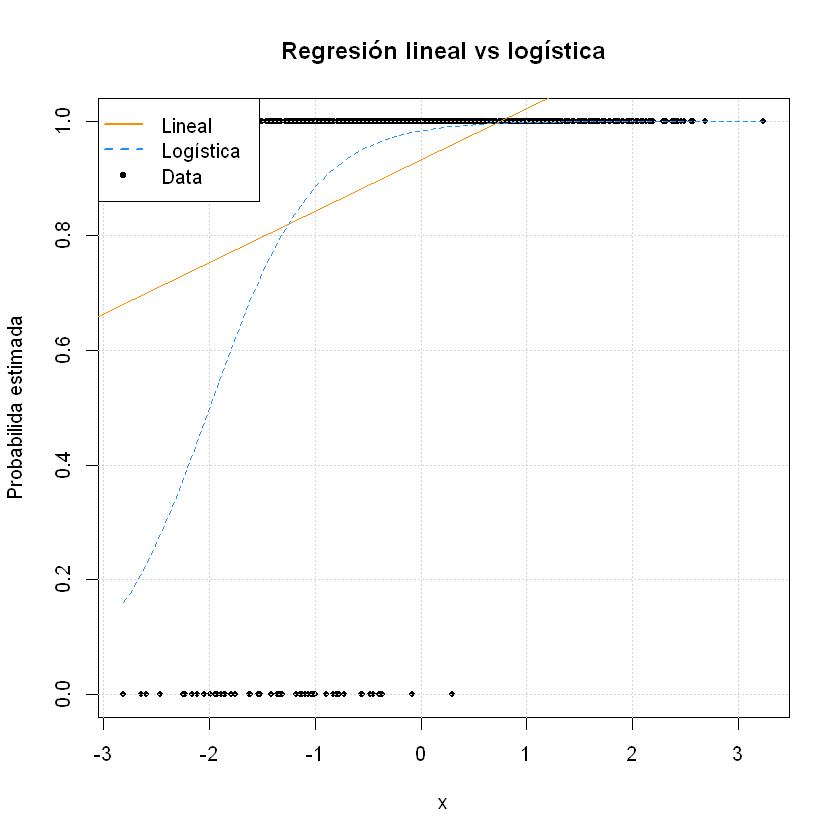

In [17]:
plot(y ~ x, data = base, 
     pch = 20, ylab = "Probabilida estimada", 
     main = "Regresión lineal vs logística")
grid()
abline(fit_lm, col = "darkorange")
curve(predict(fit_glm, data.frame(x), type = "response"), 
      add = TRUE, col = "dodgerblue", lty = 2)
legend("topleft", c("Lineal", "Logística", "Data"), lty = c(1, 2, 0), 
       pch = c(NA, NA, 20), lwd = 2, col = c("darkorange", "dodgerblue", "black"))

In [18]:
summary(fit_glm)


Call:
glm(formula = y ~ x, family = binomial(link = "logit"), data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.06480   0.07456   0.15701   0.29895   1.78001  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   4.0784     0.3186  12.800   <2e-16 ***
x             2.0418     0.2362   8.645   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.13  on 799  degrees of freedom
Residual deviance: 265.18  on 798  degrees of freedom
AIC: 269.18

Number of Fisher Scoring iterations: 7


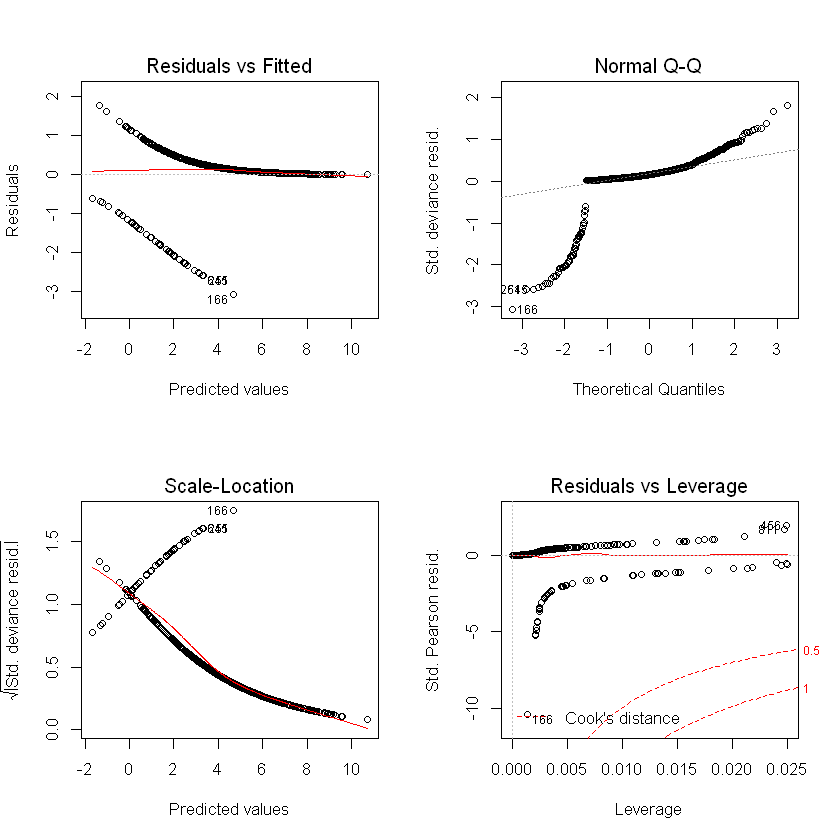

In [55]:
par(mfrow=c(2,2))
plot(fit_glm)

In [20]:
pchisq(390.13- 265.18, df=799-798, lower.tail=F)

[1] 5.219337e-29

In [29]:
anova(fit_glm,test = "LRT")

Df Deviance Resid. Df Resid. Dev Pr(>Chi)    
NULL NA       NA 799       390.1264             NA
x     1 124.9484 798       265.1781   5.223663e-29

In [45]:
glm_link_scores <- predict(fit_glm, test, type="link")
glm_link_scores

2         22         35         39         43         44         45 
 3.6084304  3.6333456  5.7559112  3.4536923  1.4947204  8.5069814  6.5448238 
        48         49         53         55         57         69         73 
 3.1255899  5.6709397  3.9908739  3.6174276  0.9161632  5.9614927  6.1319239 
        81         93         94         98        104        106        109 
 4.0901762  4.5658493  2.7963482  7.2076914  3.3687943  3.9864692  3.3020603 
       113        119        136        141        144        145        152 
 0.7750138  2.3434804  6.3883713  5.5113102  0.9857583  0.8083901  5.6486374 
       174        182        196        198        199        208        209 
 8.4242802  6.6575785  8.1563174  1.5235609  2.8305282  2.8643173  7.4492299 
       219        224        236        238        239        240        258 
 1.5541843  5.5231608  1.3893232  4.9338852  4.7405715  2.4826656  5.3662807 
       261        262        265        269        280        298        299 
 3.0143895  3.0781893  8.7604158  3.2845961  4.1287882  1.3201336  4.1212511 
       300        306        310        314        318        329        339 
 6.6304826  4.7546085  8.2387257  2.8502504  1.5084979  6.8052669  5.8461553 
       346        358        363        367        368        375        381 
 0.4986466  4.0109536  4.6373833  4.8505499  2.1480710  5.1199955  4.1489532 
       389        391        394        396        404        410        414 
 3.1889059  2.7572690  2.3847794  7.1490713  4.0195182  4.5424915  3.8278603 
       415        416        438        440        444        445        448 
 3.2337621 -1.3183750  6.2933007  6.6014459  3.6702718  2.7612131  5.8819346 
       451        452        465        469        477        478        482 
 6.9990025  6.2154137  1.8471538  4.2114382  7.5745913  3.4124862  4.7196498 
       486        495        499        501        504        505        510 
 5.6686833  2.2957704  4.8218563  2.8494620  5.6119239  0.9969905  3.9166724 
       511        512        516        518        520        526        527 
 3.8795983  4.5197471  2.5780937  4.7113996  3.7020850  5.2014867  6.6034516 
       534        540        543        544        547        562        563 
 4.3397429  3.6654715  5.5161757  1.6336299  1.6310596  5.2600423  1.8577844 
       565        569        572        574        576        578        581 
 1.6564101  3.4623005  1.1045946  4.7326043  6.8756812  4.2257569  3.4323489 
       583        589        594        595        600        604        608 
 1.6658991  5.2687588  3.4947676  5.1077319  7.8759731  0.9828998  1.1953324 
       609        614        619        621        633        636        641 
 3.4663518  4.0457329  1.5814360  1.1886841  5.1672159  0.1112782  2.3751612 
       645        647        650        652        658        660        667 
 3.2702666  2.3820558  6.0997310  4.2972682  5.1778795  4.3248916  4.4981218 
       669        689        690        691        699        712        716 
 5.2387386  3.4223258 -0.1654528  3.8917163  4.9371353  3.6438132  6.3755788 
       718        725        733        738        743        747        751 
 3.4917144  4.0818446  0.1098602  3.8809932  8.9438668  9.5743488  7.2195738 
       752        765        768        773        782        783        789 
 3.8544003  4.8313044  3.6190809  5.0124530  5.9250833  4.0839027  0.2269079 
       798        800        802        805        812        825        828 
 3.1678967  5.4004997  2.7348815  4.6425043  0.8824144  3.5318039  0.2957336 
       830        832        839        840        852        859        868 
 1.1340604  2.8587782  4.1931863  4.6890825  3.8795100  4.3779563  6.3877944 
       869        875        876        882        885        892        893 
 3.0018999  7.1079880  8.0613892  2.0937890  5.1836009  5.2259830  1.7989077 
       895        899        901        904        906        913        919 
 5.0188423  4.8362168  2.007788

In [28]:
glm_response_scores <- predict(fit_glm, test, type="response")
glm_response_scores

6         8        11        12        37        50        53        56 
0.9994898 0.8168881 0.9986109 0.9919426 0.9945647 0.9803182 0.9818519 0.9992349 
       72        73        75        81        84        85        88        91 
0.3460485 0.9978323 0.9354526 0.9835392 0.9954772 0.9741239 0.9930839 0.9977776 
       94       101       103       110       118       121       128       130 
0.9424782 0.9326356 0.9727404 0.9974134 0.9410448 0.9868568 0.9857632 0.9807878 
      131       133       135       136       153       155       167       171 
0.9991140 0.9846715 0.4715524 0.9983218 0.9914793 0.9788452 0.9954049 0.9743854 
      185       223       225       227       233       236       243       260 
0.9732985 0.9982467 0.9656398 0.9333771 0.9891904 0.8004842 0.9992024 0.7208189 
      266       273       278       281       283       286       289       300 
0.9992820 0.9958299 0.9856652 0.6623437 0.9923593 0.9872839 0.9741977 0.9986822 
      305       309       316       335       339       341       343       350 
0.9602969 0.9986462 0.9959897 0.9922244 0.9971173 0.9952878 0.9994419 0.9761324 
      352       354       358       360       361       365       366       376 
0.5024032 0.9868300 0.9822062 0.9999112 0.9748941 0.9968207 0.9746686 0.9465868 
      378       379       385       394       396       397       402       403 
0.9875487 0.9828624 0.9936351 0.9156593 0.9992150 0.9239845 0.8445204 0.9417161 
      410       412       413       426       429       437       445       446 
0.9894653 0.9902941 0.9955581 0.9592582 0.9993975 0.9960638 0.9405435 0.9880613 
      453       455       500       501       507       511       514       516 
0.9930854 0.9974038 0.9945453 0.9452909 0.9045695 0.9797590 0.9889934 0.9294383 
      520       521       523       531       536       547       550       554 
0.9759220 0.9976556 0.9341570 0.9951041 0.9967105 0.8363147 0.9498213 0.9899342 
      559       560       561       566       571       573       576       577 
0.9752925 0.9422927 0.9149683 0.9864107 0.9976267 0.9228881 0.9989685 0.9957351 
      578       579       587       598       608       610       620       624 
0.9855962 0.7310326 0.9922877 0.5285226 0.7676934 0.9125195 0.9992805 0.9883673 
      642       643       647       648       650       655       659       662 
0.9903574 0.9878679 0.9154487 0.9678138 0.9977616 0.9936929 0.9964901 0.9989904 
      685       691       697       704       705       714       718       721 
0.8756086 0.9799980 0.9769501 0.9868886 0.7844759 0.9801860 0.9704511 0.8756121 
      724       732       736       745       751       758       762       766 
0.7222922 0.9972063 0.9942350 0.9890330 0.9992684 0.9750854 0.9952132 0.9976584 
      769       775       776       787       796       804       809       810 
0.9683595 0.9905229 0.9996340 0.9966867 0.9968282 0.9983941 0.9904592 0.9771391 
      812       813       822       823       825       826       827       829 
0.7073223 0.9805414 0.9962938 0.9803359 0.9715793 0.9463373 0.9653203 0.8442618 
      830       831       836       840       844       849       851       854 
0.7565874 0.9980366 0.9906040 0.9908887 0.9853648 0.9993749 0.9946561 0.8478380 
      862       872       874       881       883       885       891       895 
0.9874979 0.9875272 0.9973305 0.9936468 0.9758791 0.9944235 0.8865513 0.9934313 
      896       902       903       905       906       907       908       909 
0.9338319 0.9214854 0.9908980 0.9981542 0.9428466 0.9968737 0.9816434 0.9909296 
      910       911       912       913       914       916       921       922 
0.9901464 0.9999119 0.8400075 0.9864063 0.6092234 0.9981987 0.9620599 0.9745494 
      932       935       940       944       945       949       955       961 
0.7921303 0.9829742 0.9989645 0.9132466 0.9586618 0.9713210 0.9918733 0.9965965 
      971       972       976       978       980       982       987       990 
0.9850822 0.4421950 0.8624168 0.9858179

In [35]:
predicted.classes <- ifelse(glm_response_scores > 0.5, 1, 0)
predicted.classes

6   8  11  12  37  50  53  56  72  73  75  81  84  85  88  91  94 101 103 110 
  1   1   1   1   1   1   1   1   0   1   1   1   1   1   1   1   1   1   1   1 
118 121 128 130 131 133 135 136 153 155 167 171 185 223 225 227 233 236 243 260 
  1   1   1   1   1   1   0   1   1   1   1   1   1   1   1   1   1   1   1   1 
266 273 278 281 283 286 289 300 305 309 316 335 339 341 343 350 352 354 358 360 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
361 365 366 376 378 379 385 394 396 397 402 403 410 412 413 426 429 437 445 446 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
453 455 500 501 507 511 514 516 520 521 523 531 536 547 550 554 559 560 561 566 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
571 573 576 577 578 579 587 598 608 610 620 624 642 643 647 648 650 655 659 662 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
685 691 697 704 705 714 718 721 724 732 736 745 751 758 762 766 769 775 776 787 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
796 804 809 810 812 813 822 823 825 826 827 829 830 831 836 840 844 849 851 854 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
862 872 874 881 883 885 891 895 896 902 903 905 906 907 908 909 910 911 912 913 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
914 916 921 922 932 935 940 944 945 949 955 961 971 972 976 978 980 982 987 990 
  1   1   1   1   1   1   1   1   1   1   1   1   1   0   1   1   1   1   1   1

In [42]:
test$y

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
[149] 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0

ERROR: Error in parse(text = x, srcfile = src): <text>:1:28: inesperado '$'
1: simple_roc <- function(test$
                               ^


In [49]:
library(pROC)
roc_info <- roc(test$y, predicted.classes, legacy.axes = TRUE)


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test$y, predictor = predicted.classes,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "Porcentaje Falsos positivos",     ylab = "Porcentaje verdaderos postivios", col = "#377eb8",     lwd = 2, print.auc = TRUE, print.auc.x = 45, partial.auc = c(100,         90), auc.polygon.col = "#377eb850")

Data: predicted.classes in 13 controls (test$y 0) < 187 cases (test$y 1).
Partial area under the curve (specificity 100%-90%): 0.5359%

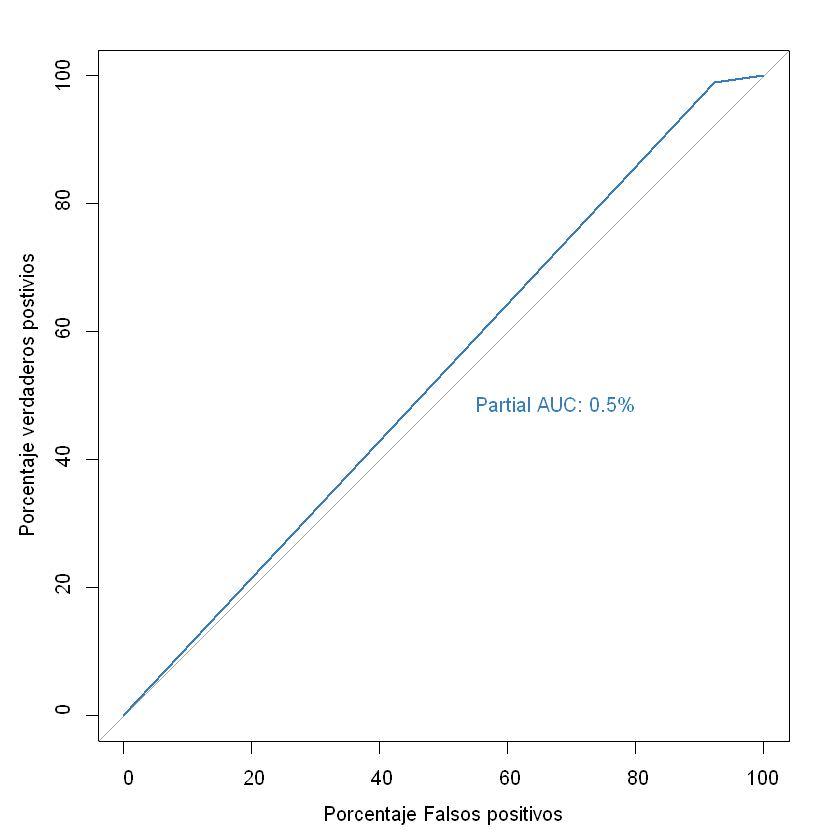

In [54]:
par(pty = "s") # square
roc(test$y, predicted.classes, plot = TRUE, legacy.axes = TRUE,
    percent = TRUE, xlab = "Porcentaje Falsos positivos",
    ylab = "Porcentaje verdaderos postivios", col = "#377eb8", lwd = 2,
    print.auc = TRUE, print.auc.x =45, partial.auc = c(100, 90), # en terminos de especificidad
    auc.polygon.col = "#377eb850")

### Ejemplo de Aplicación <a class="anchor" id="ejemplo"></a>

Se dispone de un registro que contiene cientos de emails con información de cada uno de ellos. El objetivo de estudio es intentar crear un modelo que permita filtrar qué emails son “spam” y cuáles no, en función de determinadas características. Ejemplo extraído del libro OpenIntro Statistics.

In [72]:
install.packages("openintro")
library(openintro)
data(email)
str(email)

also installing the dependencies 'airports', 'cherryblossom', 'usdata'




package 'airports' successfully unpacked and MD5 sums checked
package 'cherryblossom' successfully unpacked and MD5 sums checked
package 'usdata' successfully unpacked and MD5 sums checked
package 'openintro' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Windows\AppData\Local\Temp\Rtmpsbilxg\downloaded_packages


Warning message:
"package 'openintro' was built under R version 3.6.3"
Loading required package: airports

Warning message:
"package 'airports' was built under R version 3.6.3"
Loading required package: cherryblossom

Warning message:
"package 'cherryblossom' was built under R version 3.6.3"
Loading required package: usdata

Warning message:
"package 'usdata' was built under R version 3.6.3"

Attaching package: 'openintro'


The following object is masked from 'package:caret':

    dotPlot


The following objects are masked from 'package:lattice':

    ethanol, lsegments




tibble [3,921 x 21] (S3: tbl_df/tbl/data.frame)
 $ spam        : num [1:3921] 0 0 0 0 0 0 0 0 0 0 ...
 $ to_multiple : num [1:3921] 0 0 0 0 0 0 1 1 0 0 ...
 $ from        : num [1:3921] 1 1 1 1 1 1 1 1 1 1 ...
 $ cc          : int [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ sent_email  : num [1:3921] 0 0 0 0 0 0 1 1 0 0 ...
 $ time        : POSIXct[1:3921], format: "2012-01-01 01:16:41" "2012-01-01 02:03:59" ...
 $ image       : num [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ attach      : num [1:3921] 0 0 0 0 0 0 0 1 0 0 ...
 $ dollar      : num [1:3921] 0 0 4 0 0 0 0 0 0 0 ...
 $ winner      : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ inherit     : num [1:3921] 0 0 1 0 0 0 0 0 0 0 ...
 $ viagra      : num [1:3921] 0 0 0 0 0 0 0 0 0 0 ...
 $ password    : num [1:3921] 0 0 0 0 2 2 0 0 0 0 ...
 $ num_char    : num [1:3921] 11.37 10.5 7.77 13.26 1.23 ...
 $ line_breaks : int [1:3921] 202 202 192 255 29 25 193 237 69 68 ...
 $ format      : num [1:3921] 1 1 1 1 0 0 1 1 0 1 ...
 $ re_subj 

En este caso se van a emplear únicamente como posibles predictores variables categóricas. Esto se debe a que los outliers complican bastante la creación de estos modelos y, en el data set que se emplea como ejemplo, las variables cuantitativas son muy asimétricas. En particular, las variables que se van a estudiar como posibles predictores son:
- **spam**: si el email es spam (1) si no lo es (0).
- **to_multiple**: si hay más de una persona en la lista de distribución.
- **format**: si está en formato HTLM.
- **cc**: si hay otras direcciones en copia.
- **attach**: si hay archivos adjuntos.
- **dollar**: si el email contiene la palabra dollar o el símbolo $\$$.
- **inherit**: si contiene la palabra inherit.
- **winner**: si el email contiene la palabra winner.
- **password**: si el email contiene la palabra password.
- **re_subj**: si la palabra “Re:” está escrita en el asunto del email.
- **exclaim_subj**: si se incluye algún signo de exclamación en el email.



In [90]:
library(caret) 
trainIndex <- createDataPartition(email$spam,p=0.8,list=FALSE)
train <- email[trainIndex, ]
test <- email[-trainIndex, ]

Warning message:
"The `i` argument of ``[`()` can't be a matrix as of tibble 3.0.0.
Convert to a vector.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


In [91]:
head(train)
dim(train)
head(test)
dim(test)

spam to_multiple from cc sent_email time                image attach dollar
1 0    0           1    0  0          2012-01-01 01:16:41 0     0      0     
2 0    0           1    0  0          2012-01-01 02:03:59 0     0      0     
3 0    0           1    0  0          2012-01-01 11:00:32 0     0      4     
4 0    0           1    0  0          2012-01-01 04:09:49 0     0      0     
5 0    0           1    0  0          2012-01-01 05:00:01 0     0      0     
6 0    0           1    0  0          2012-01-01 05:04:46 0     0      0     
  winner ... viagra password num_char line_breaks format re_subj exclaim_subj
1 no     ... 0      0        11.370   202         1      0       0           
2 no     ... 0      0        10.504   202         1      0       0           
3 no     ... 0      0         7.773   192         1      0       0           
4 no     ... 0      0        13.256   255         1      0       0           
5 no     ... 0      2         1.231    29         0      0       0           
6 no     ... 0      2         1.091    25         0      0       0           
  urgent_subj exclaim_mess number
1 0            0           big   
2 0            1           small 
3 0            6           small 
4 0           48           small 
5 0            1           none  
6 0            1           none

[1] 3137   21

spam to_multiple from cc sent_email time                image attach dollar
1 0    1           1    0  1          2012-01-01 12:55:06 0     0      0     
2 0    0           1    1  0          2012-01-01 16:40:51 0     0      0     
3 0    0           1    2  0          2012-01-01 18:32:53 0     0      2     
4 0    0           1    0  0          2012-01-01 21:05:47 2     2      9     
5 0    0           1    0  0          2012-01-01 21:51:24 0     0      0     
6 0    0           1    2  0          2012-01-01 23:07:57 0     0      0     
  winner ... viagra password num_char line_breaks format re_subj exclaim_subj
1 no     ... 0      0         4.837   193         1      0       0           
2 no     ... 0      0         4.020    79         0      1       0           
3 no     ... 0      0        19.693   330         1      1       0           
4 no     ... 0      0        11.453   344         1      0       0           
5 no     ... 0      0         2.228    45         0      1       0           
6 no     ... 0      0         4.549    67         0      1       0           
  urgent_subj exclaim_mess number
1 0           1            big   
2 0           1            small 
3 0           4            big   
4 0           4            big   
5 0           1            small 
6 0           1            small

[1] 784  21

En primer lugar se genera el modelo completo introduciendo todas las variables como predictores.

In [92]:
modelo_completo <- glm(spam ~ to_multiple + format + cc + attach + dollar +
                        winner + inherit + password + re_subj + exclaim_subj,
                        data = train,
                        family = binomial)
summary(modelo_completo)


Call:
glm(formula = spam ~ to_multiple + format + cc + attach + dollar + 
    winner + inherit + password + re_subj + exclaim_subj, family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6432  -0.4429  -0.2317  -0.0915   3.8306  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.77021    0.09990  -7.710 1.26e-14 ***
to_multiple  -3.20635    0.40176  -7.981 1.46e-15 ***
format       -1.50243    0.13642 -11.013  < 2e-16 ***
cc            0.03944    0.01983   1.989  0.04672 *  
attach        0.18599    0.06589   2.823  0.00476 ** 
dollar       -0.06177    0.02435  -2.536  0.01121 *  
winneryes     1.82025    0.36776   4.950 7.44e-07 ***
inherit       0.01056    0.28882   0.037  0.97085    
password     -0.68414    0.29125  -2.349  0.01883 *  
re_subj      -3.20097    0.41977  -7.626 2.43e-14 ***
exclaim_subj  0.13690    0.25699   0.533  0.59424    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05

Se mejora el modelo excluyendo aquellos predictores cuyo p-values no es significativo. El resultado es el siguiente modelo.



In [93]:
modelo_final <- glm(spam ~ to_multiple + format + attach + dollar + winner +
                    inherit + password + re_subj,
                    data = train,
                    family = binomial)
summary(modelo_final)


Call:
glm(formula = spam ~ to_multiple + format + attach + dollar + 
    winner + inherit + password + re_subj, family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6635  -0.4467  -0.2288  -0.0926   3.8233  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.75212    0.09897  -7.599 2.97e-14 ***
to_multiple -3.12768    0.39537  -7.911 2.56e-15 ***
format      -1.50241    0.13591 -11.054  < 2e-16 ***
attach       0.18815    0.06476   2.906  0.00367 ** 
dollar      -0.06046    0.02366  -2.555  0.01062 *  
winneryes    1.84710    0.36837   5.014 5.33e-07 ***
inherit      0.02034    0.28312   0.072  0.94272    
password    -0.68757    0.29204  -2.354  0.01856 *  
re_subj     -3.19492    0.41983  -7.610 2.74e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1965.2  on 3136  degrees of freedom
Residual 

In [76]:
# install.packages("vcd")
library(vcd)
predicciones <- ifelse(test = modelo_final$fitted.values > 0.5, yes = 1, no = 0)
matriz_confusion <- table(modelo_final$model$spam, predicciones,
                          dnn = c("observaciones", "predicciones"))
matriz_confusion

package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Windows\AppData\Local\Temp\Rtmpsbilxg\downloaded_packages


Warning message:
"package 'vcd' was built under R version 3.6.3"
Loading required package: grid



             predicciones
observaciones    0    1
            0 3551    3
            1  355   12

In [98]:
glm_response_scores <- predict(modelo_final, test, type="response")
glm_response_scores


1            2            3            4            5            6 
4.576609e-03 1.894602e-02 3.794637e-03 8.148288e-02 1.894602e-02 1.894602e-02 
           7            8            9           10           11           12 
4.280295e-03 1.883297e-04 1.894602e-02 9.495979e-02 2.583777e-01 9.495979e-02 
          13           14           15           16           17           18 
1.193071e-03 9.495979e-02 8.506427e-02 9.495979e-02 4.280295e-03 4.280295e-03 
          19           20           21           22           23           24 
9.495979e-02 9.495979e-02 3.036190e-02 4.057467e-03 4.280295e-03 4.280295e-03 
          25           26           27           28           29           30 
9.495979e-02 9.495979e-02 3.752884e-02 4.280295e-03 2.643177e-03 2.023697e-02 
          31           32           33           34           35           36 
2.699716e-02 4.576609e-03 9.495979e-02 4.280295e-03 1.894602e-02 1.894602e-02 
          37           38           39           40           41           42 
4.280295e-03 2.023697e-02 8.506427e-02 9.495979e-02 4.280295e-03 2.583982e-02 
          43           44           45           46           47           48 
2.583982e-02 4.280295e-03 7.611322e-02 2.545358e-02 3.363897e-03 9.495979e-02 
          49           50           51           52           53           54 
4.576609e-03 4.280295e-03 9.495979e-02 9.495979e-02 9.495979e-02 2.023697e-02 
          55           56           57           58           59           60 
9.495979e-02 1.894602e-02 1.883297e-04 4.306719e-02 9.495979e-02 1.797349e-02 
          61           62           63           64           65           66 
5.518810e-03 4.280295e-03 9.495979e-02 9.495979e-02 1.894602e-02 6.192726e-02 
          67           68           69           70           71           72 
4.280295e-03 2.023697e-02 4.576609e-03 3.203605e-01 1.883297e-04 3.073418e-01 
          73           74           75           76           77           78 
3.073418e-01 4.280295e-03 4.280295e-03 3.073418e-01 4.280295e-03 4.280295e-03 
          79           80           81           82           83           84 
9.495979e-02 1.894602e-02 3.363897e-03 6.075601e-02 8.506427e-02 3.203605e-01 
          85           86           87           88           89           90 
4.280295e-03 2.023697e-02 7.755608e-02 1.883297e-04 1.894602e-02 3.794637e-03 
          91           92           93           94           95           96 
7.755608e-02 2.946229e-01 2.946229e-01 9.495979e-02 3.203605e-01 3.203605e-01 
          97           98           99          100          101          102 
3.116892e-01 3.995287e-01 3.203605e-01 1.091029e-01 3.626306e-01 3.203605e-01 
         103          104          105          106          107          108 
4.071370e-01 9.495979e-02 4.071370e-01 3.626306e-01 1.124082e-01 9.495979e-02 
         109          110          111          112          113          114 
4.165814e-07 3.794637e-03 3.794637e-03 3.794637e-03 9.495979e-02 4.280295e-03 
         115          116          117          118          119          120 
9.495979e-02 5.518810e-03 2.277880e-02 2.023697e-02 9.495979e-02 2.023697e-02 
         121          122          123          124          125          126 
7.755608e-02 4.280295e-03 3.203605e-01 2.701311e-01 3.203605e-01 4.280295e-03 
         127          128          129          130          131          132 
5.631586e-03 4.576609e-03 2.023697e-02 4.280295e-03 9.495979e-02 4.280295e-03 
         133          134          135          136          137          138 
9.495979e-02 1.883297e-04 1.883297e-04 3.203605e-01 9.495979e-02 6.803402e-02 
         139          140          141          142          143          144 
4.280295e-03 9.495979e-02 4.280295e-03 4.280295e-03 9.495979e-02 1.492106e-02 
         145          146          147          148          149          150 
4.576609e-03 1.124082e-01 9.495979e-02 4.280295e-03 4.280295e-03 4.280295e-03 
         151          152          153          154          

In [99]:
predicted.classes <- ifelse(glm_response_scores > 0.5, 1, 0)
predicted.classes


1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0 
321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 
  0   0   0   0   0   0   0   0  

In [103]:
library(pROC)
roc_info <- roc(test$spam, predicted.classes, legacy.axes = TRUE)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test$spam, predictor = predicted.classes,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "Porcentaje Falsos positivos",     ylab = "Porcentaje verdaderos postivios", col = "#377eb8",     lwd = 2, print.auc = TRUE, print.auc.x = 45, partial.auc = c(100,         90), auc.polygon.col = "#377eb850")

Data: predicted.classes in 714 controls (test$spam 0) < 70 cases (test$spam 1).
Partial area under the curve (specificity 100%-90%): 0.6217%

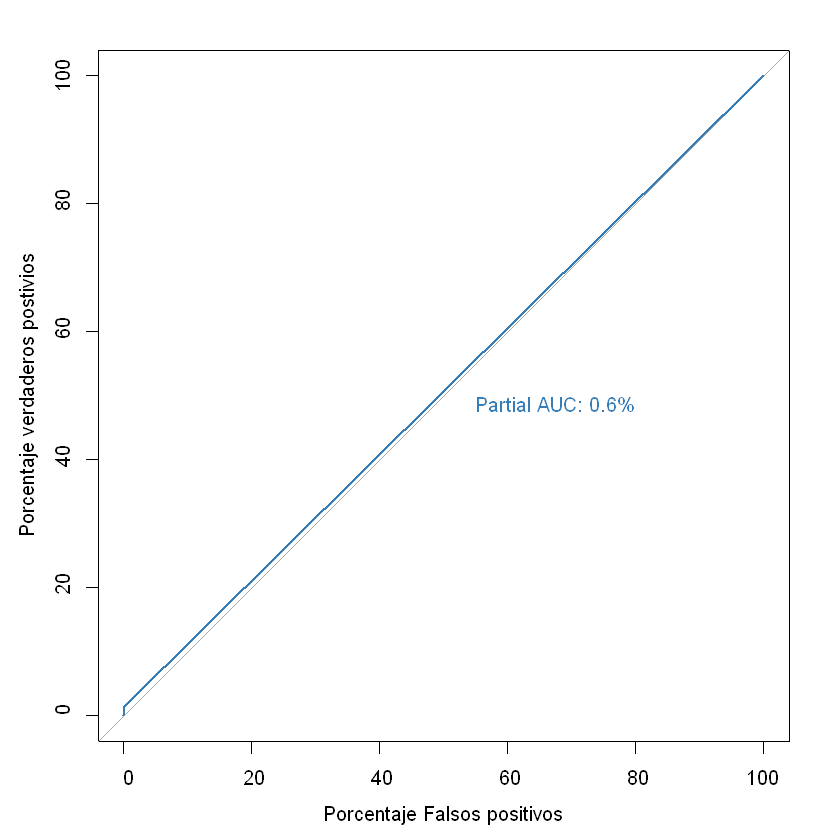

In [106]:
par(pty = "s") # square
roc(test$spam, predicted.classes, plot = TRUE, legacy.axes = TRUE,
    percent = TRUE, xlab = "Porcentaje Falsos positivos",
    ylab = "Porcentaje verdaderos postivios", col = "#377eb8", lwd = 2,
    print.auc = TRUE, print.auc.x =45, partial.auc = c(100, 90), # en terminos de especificidad
    auc.polygon.col = "#377eb850")

In [115]:
library(tidyverse) 
library(MASS)
library(car)
library(e1071)
library(caret)
library(cowplot)
library(caTools)
library(pROC)
library(ggcorrplot)


In [144]:
telco  = read.csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
dim(telco)

[1] 7043   21

In [145]:
glimpse(telco)

Rows: 7,043
Columns: 21
$ customerID       <fct> 7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 92...
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Fe...
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ Partner          <fct> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No,...
$ Dependents       <fct> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No,...
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49...
$ PhoneService     <fct> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Yes...
$ MultipleLines    <fct> No phone service, No, No, No phone service, No, Ye...
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fibe...
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, ...
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No...
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No...
$ TechSupport      <fct> No,

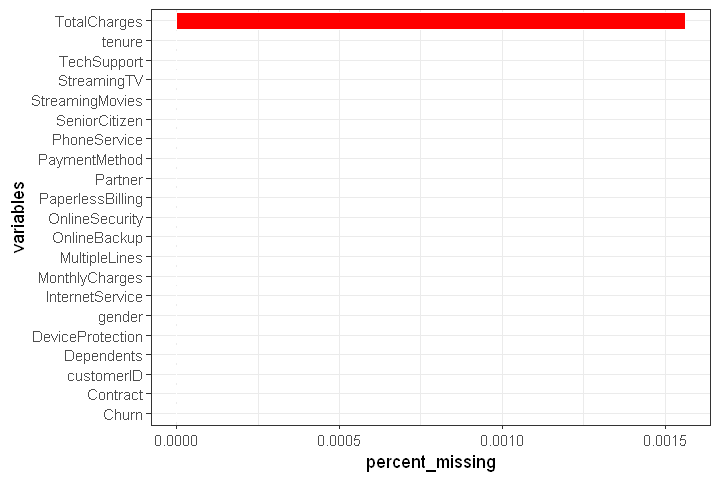

In [146]:
options(repr.plot.width = 6, repr.plot.height = 4)
missing_data <- telco %>% summarise_all(funs(sum(is.na(.))/n()))
missing_data <- gather(missing_data, key = "variables", value = "percent_missing")
ggplot(missing_data, aes(x = reorder(variables, percent_missing), y = percent_missing)) +
geom_bar(stat = "identity", fill = "red", aes(color = I('white')), size = 0.3)+
xlab('variables')+
coord_flip()+ 
theme_bw()

- Solo faltan 11 datos en el campo TotalCharges, así que elimine esas filas del conjunto de datos.
- Hay tres variables continuas y son Tenure, MonthlyCharges y TotalCharges. SeniorCitizen está en forma 'int', que se puede cambiar a categórica

In [147]:
telco <- telco[complete.cases(telco),]

telco$SeniorCitizen <- as.factor(ifelse(telco$SeniorCitizen==1, 'YES', 'NO'))

In [148]:
theme1 <- theme_bw()+
theme(axis.text.x = element_text(angle = 0, hjust = 1, vjust = 0.5),legend.position="none")
theme2 <- theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),legend.position="none")

`summarise()` ungrouping output (override with `.groups` argument)



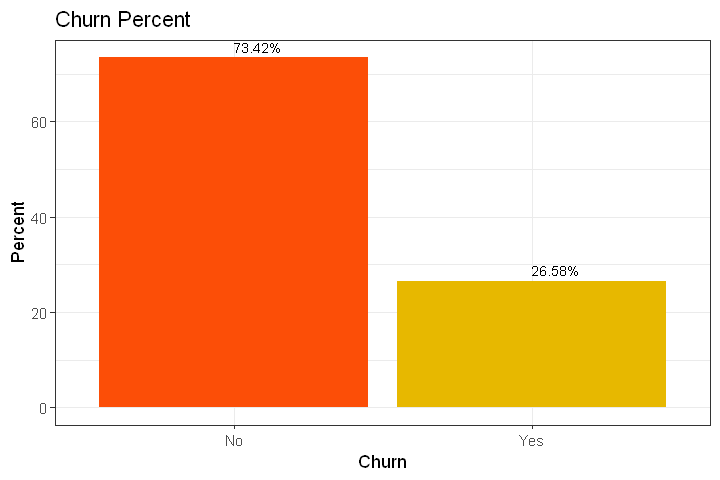

In [149]:
options(repr.plot.width = 6, repr.plot.height = 4)
telco %>% 
group_by(Churn) %>% 
summarise(Count = n())%>% 
mutate(percent = prop.table(Count)*100)%>%
ggplot(aes(reorder(Churn, -percent), percent), fill = Churn)+
geom_col(fill = c("#FC4E07", "#E7B800"))+
geom_text(aes(label = sprintf("%.2f%%", percent)), hjust = 0.01,vjust = -0.5, size =3)+ 
theme_bw()+  
xlab("Churn") + 
ylab("Percent")+
ggtitle("Churn Percent")

La columna CHURN da cuenta de la cantidad de Clientes que se fueron durante el último mes. Alrededor del 26% de los clientes abandonaron la plataforma en el último mes.

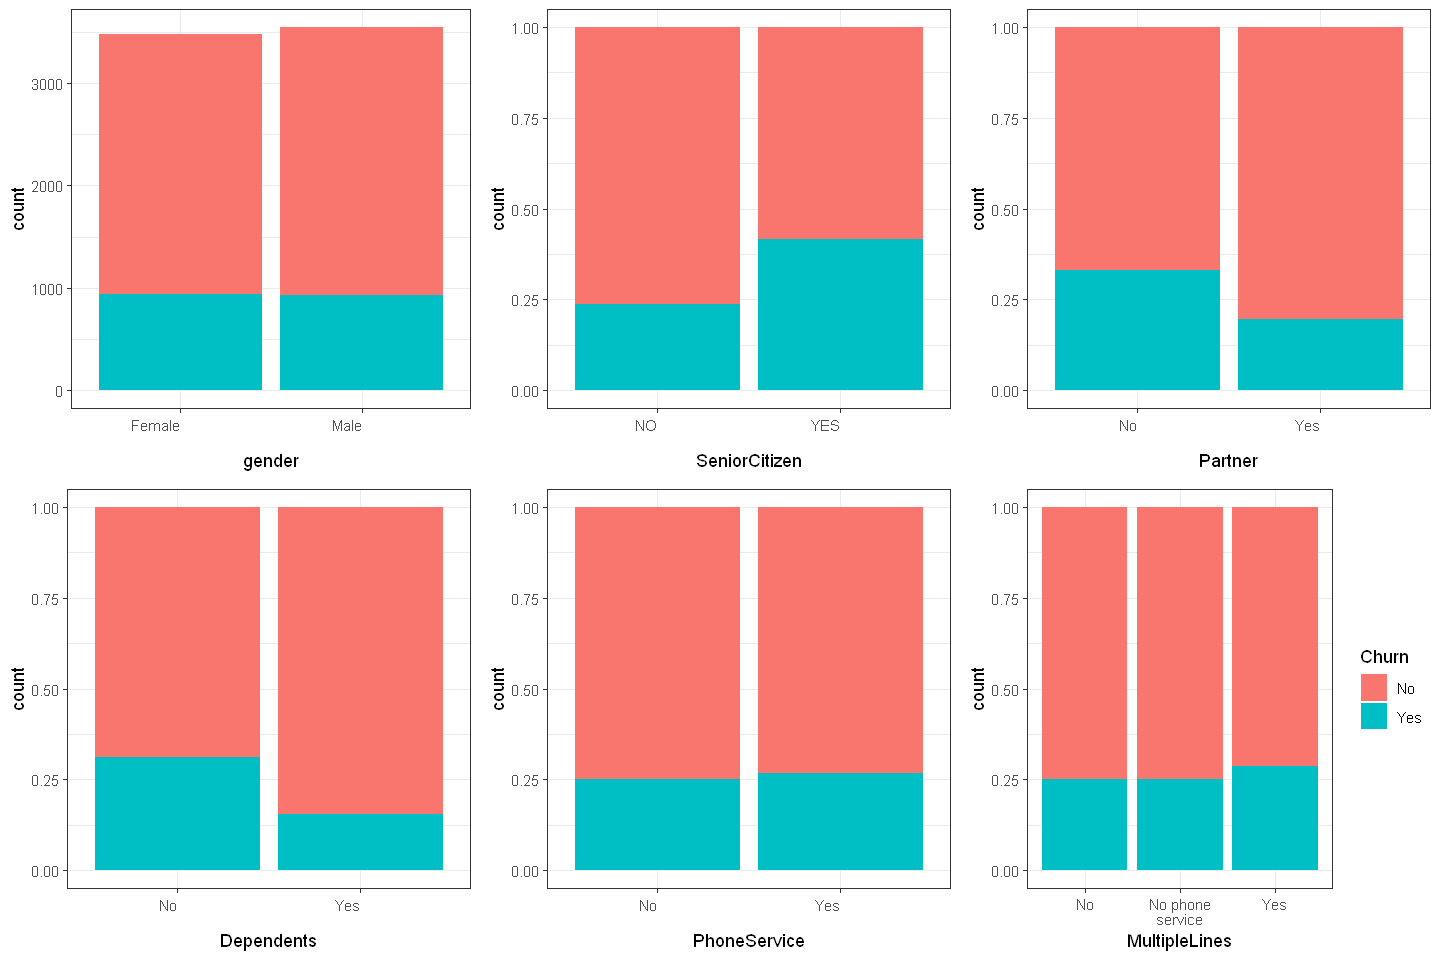

In [150]:
options(repr.plot.width = 12, repr.plot.height = 8)
plot_grid(ggplot(telco, aes(x=gender,fill=Churn))+ geom_bar()+ theme1, 
          ggplot(telco, aes(x=SeniorCitizen,fill=Churn))+ geom_bar(position = 'fill')+theme1,
          ggplot(telco, aes(x=Partner,fill=Churn))+ geom_bar(position = 'fill')+theme1,
          ggplot(telco, aes(x=Dependents,fill=Churn))+ geom_bar(position = 'fill')+theme1,
          ggplot(telco, aes(x=PhoneService,fill=Churn))+ geom_bar(position = 'fill')+theme1,
          ggplot(telco, aes(x=MultipleLines,fill=Churn))+ geom_bar(position = 'fill')+theme_bw()+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          align = "h")

- Género: el porcentaje de abandono es casi igual en el caso de hombres y mujeres
- El porcentaje de abandono es mayor en el caso de las personas mayores
- Los clientes con socios y dependientes tienen una tasa de abandono más baja en comparación con aquellos que no tienen socios y dependientes.

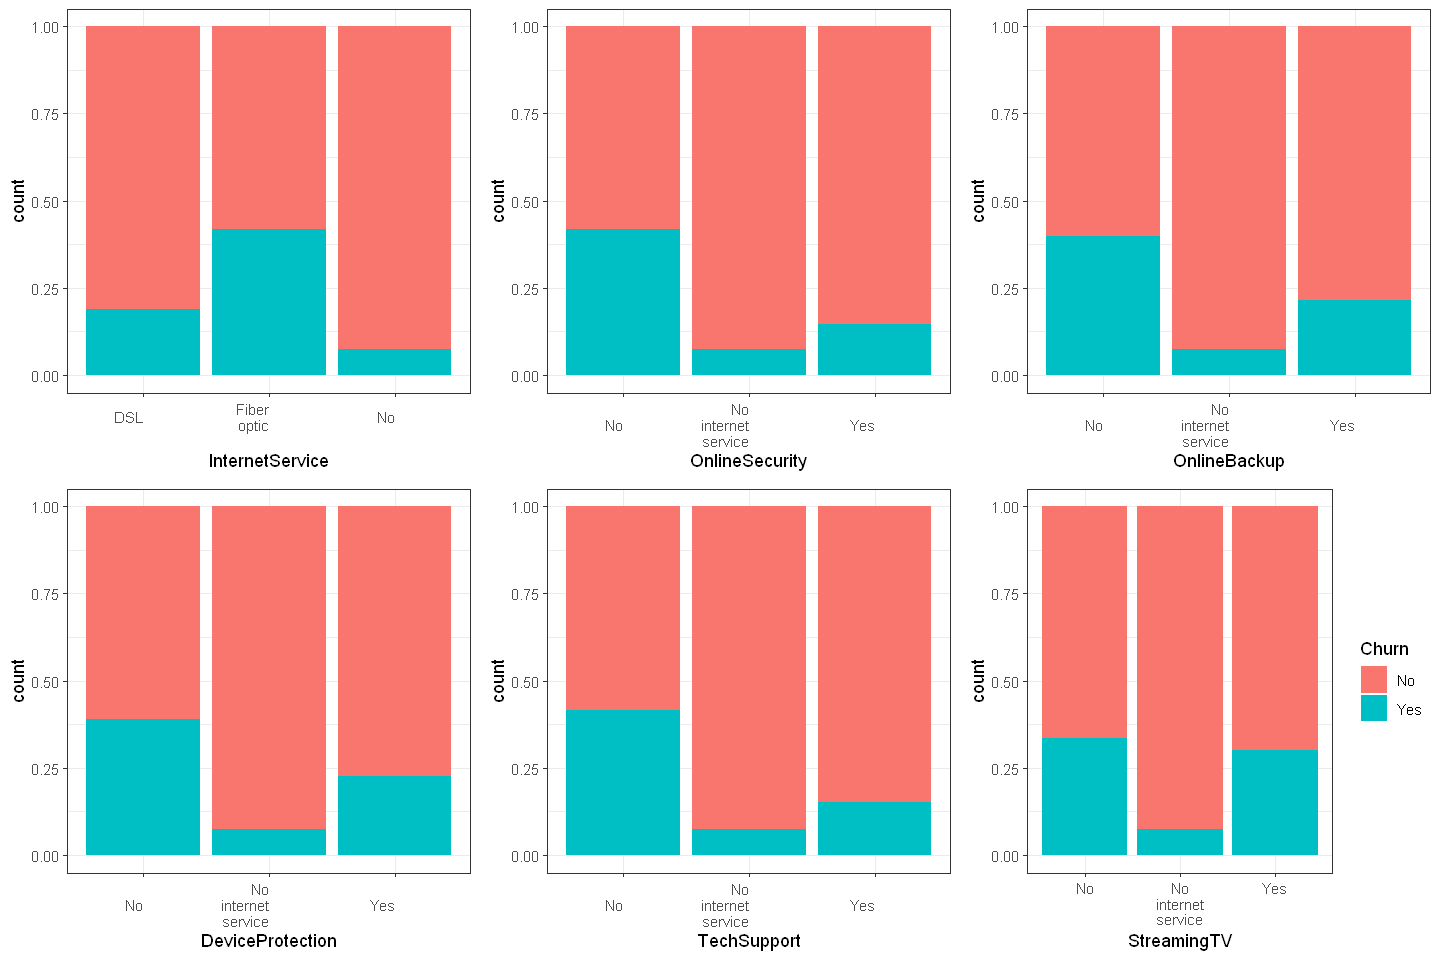

In [151]:
options(repr.plot.width = 12, repr.plot.height = 8)
plot_grid(ggplot(telco, aes(x=InternetService,fill=Churn))+ geom_bar(position = 'fill')+ theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)), 
          ggplot(telco, aes(x=OnlineSecurity,fill=Churn))+ geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=OnlineBackup,fill=Churn))+ geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=DeviceProtection,fill=Churn))+ geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=TechSupport,fill=Churn))+ geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=StreamingTV,fill=Churn))+ geom_bar(position = 'fill')+theme_bw()+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          align = "h")

- La tasa de abandono es mucho mayor en el caso de los servicios de Internet de fibra óptica.
- Los clientes que no tienen servicios como No OnlineSecurity, OnlineBackup y TechSupport abandonaron la plataforma el mes pasado.

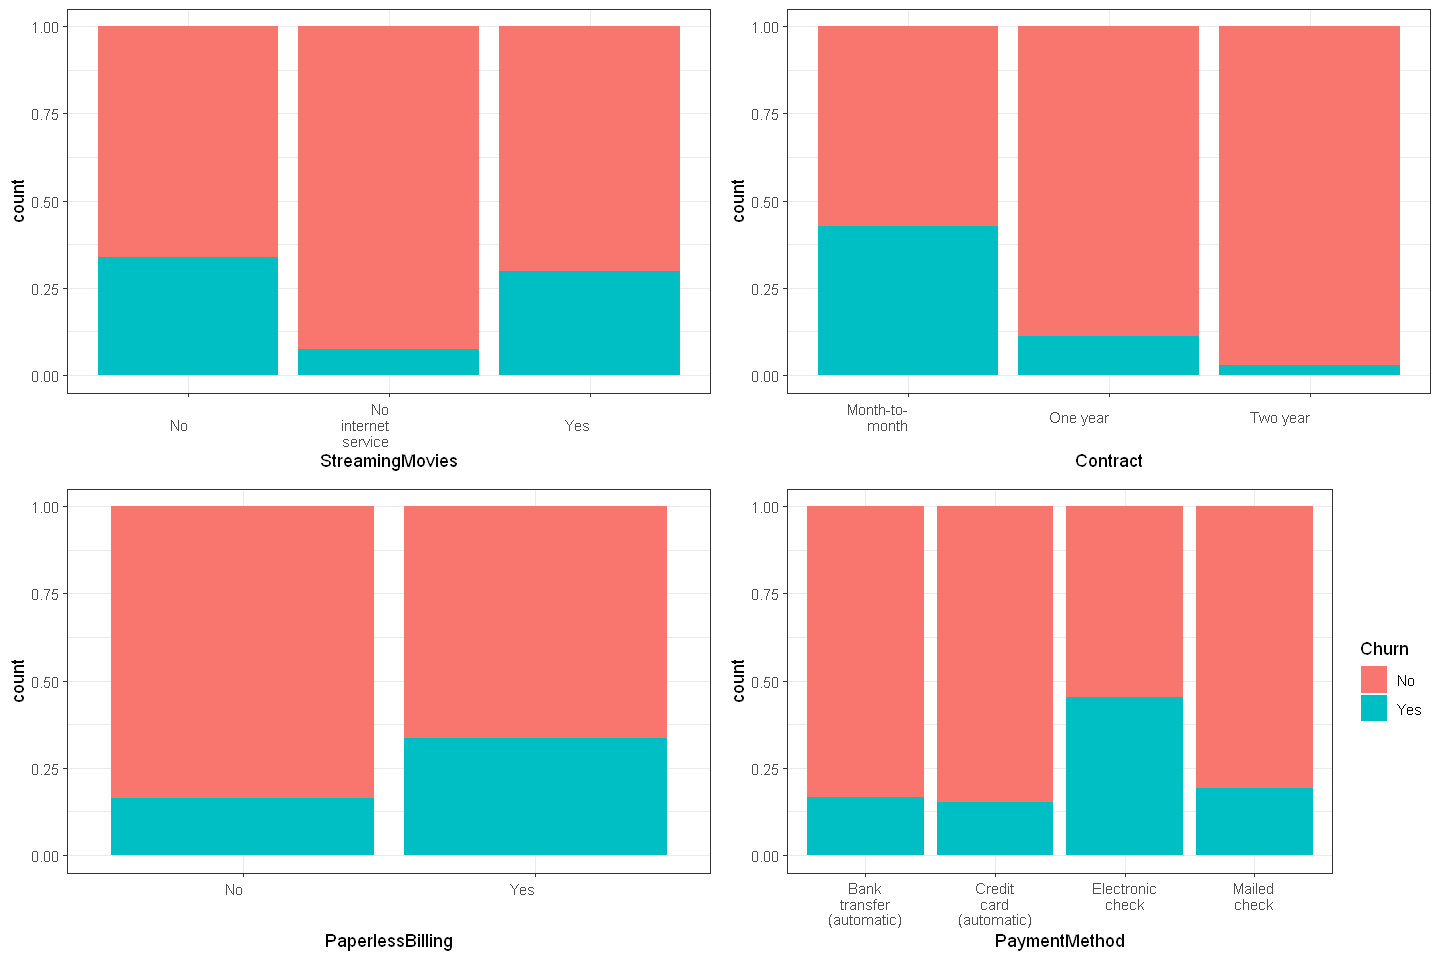

In [152]:
plot_grid(ggplot(telco, aes(x=StreamingMovies,fill=Churn))+ 
          geom_bar(position = 'fill')+ theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)), 
          ggplot(telco, aes(x=Contract,fill=Churn))+ 
          geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=PaperlessBilling,fill=Churn))+ 
          geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=PaymentMethod,fill=Churn))+
          geom_bar(position = 'fill')+theme_bw()+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          align = "h")

- Un porcentaje mayor de Clientes con suscripción mensual se ha ido en comparación con Clientes con contrato de uno o dos años.
- El porcentaje de abandono es mayor en el caso de los clientes que tienen la opción de facturación electrónica.
- Los clientes que tienen el método de pago ElectronicCheck tienden a abandonar la plataforma más en comparación con otras opciones.

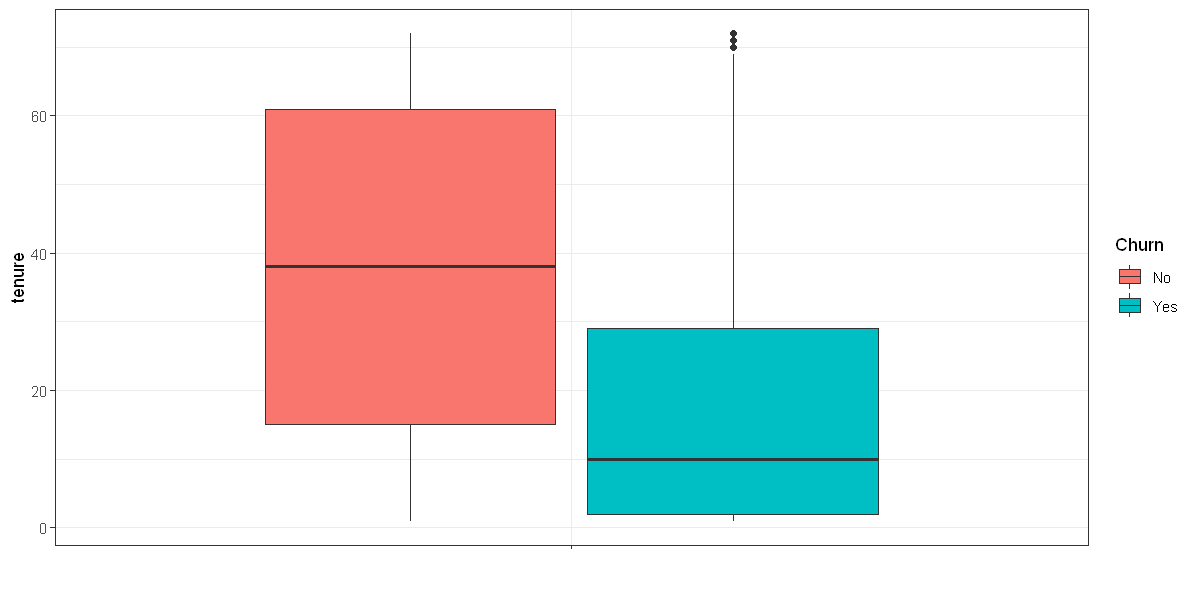

In [153]:
options(repr.plot.width =10, repr.plot.height = 5)
ggplot(telco, aes(y= tenure, x = "", fill = Churn)) + 
geom_boxplot()+ 
theme_bw()+
xlab(" ")

Tenure: La permanencia media de los clientes que se han ido es de unos 10 meses.

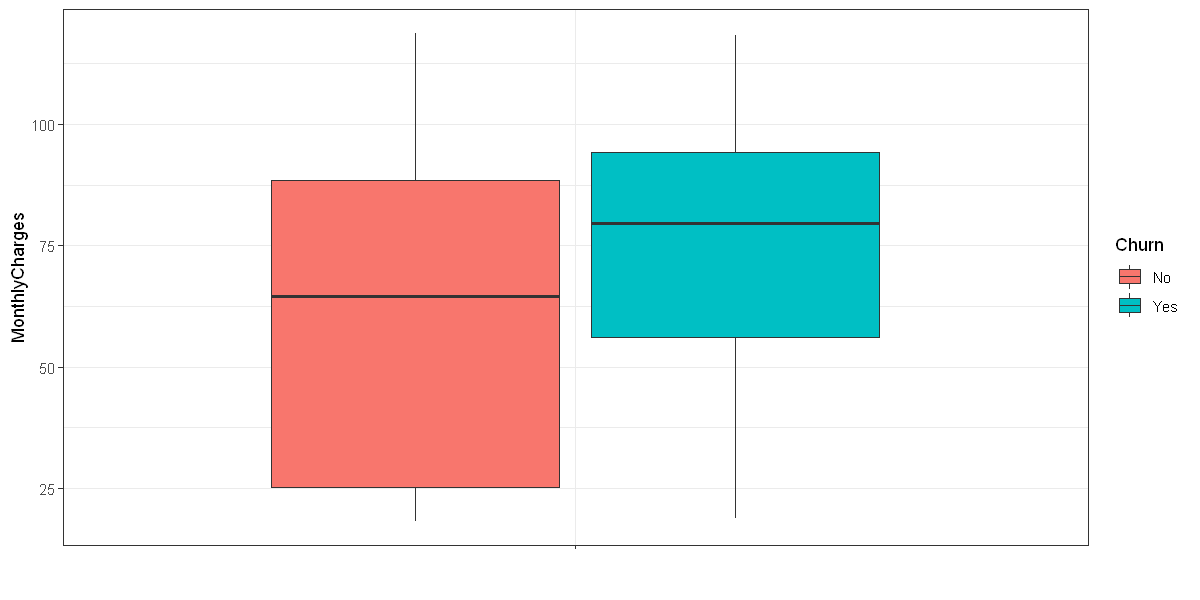

In [154]:
ggplot(telco, aes(y= MonthlyCharges, x = "", fill = Churn)) + 
geom_boxplot()+ 
theme_bw()+
xlab(" ")

MonthlyCharges: Los clientes que se han ido tienen cargos mensuales elevados. La mediana está por encima de 75.

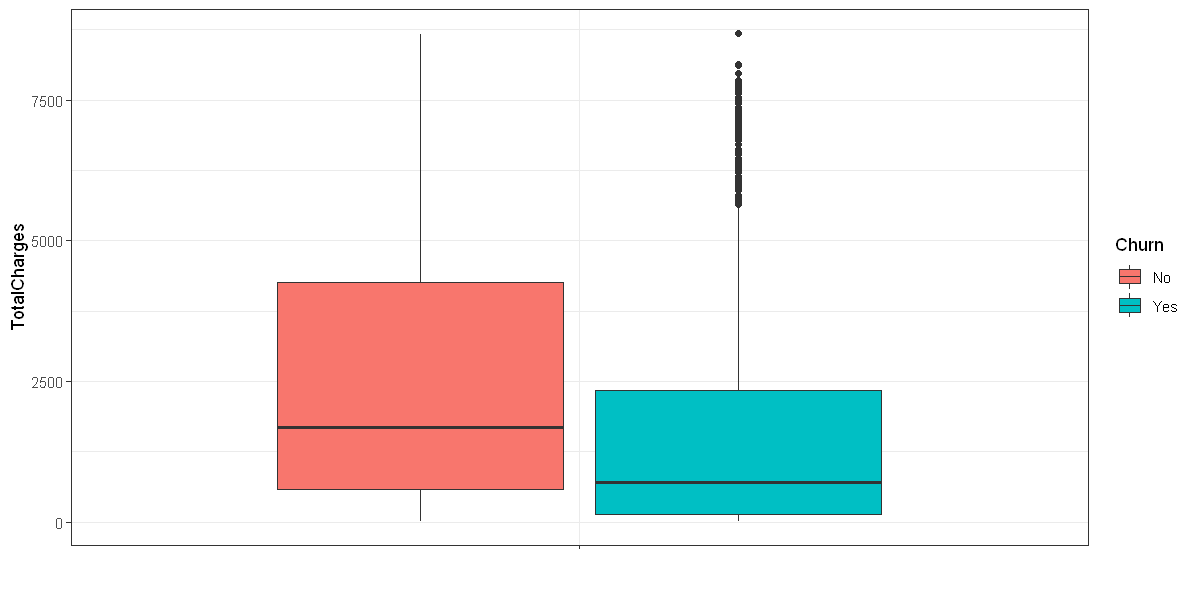

In [155]:
ggplot(telco, aes(y= TotalCharges, x = "", fill = Churn)) + 
geom_boxplot()+ 
theme_bw()+
xlab(" ")

TotalCharges:* La mediana de los cargos totales de los clientes que han abandonado es baja.

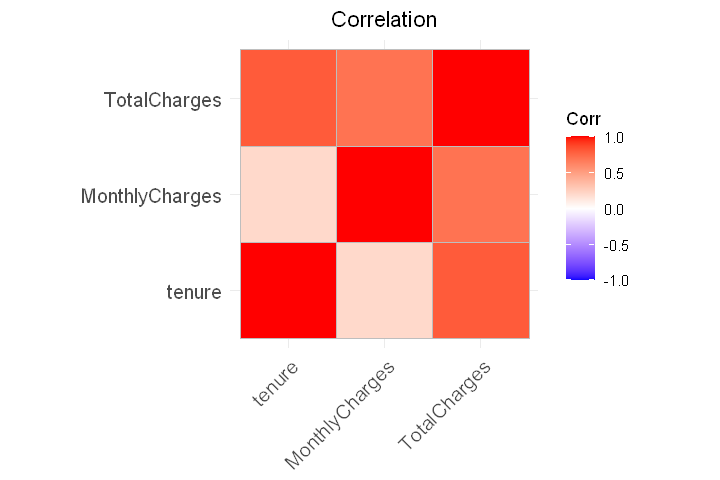

In [157]:
options(repr.plot.width =6, repr.plot.height = 4)
telco_cor <- round(cor(telco[,c("tenure", "MonthlyCharges", "TotalCharges")]), 1)

ggcorrplot(telco_cor,  title = "Correlation")+theme(plot.title = element_text(hjust = 0.5))

### Preparación de datos 

Estandarizando valores diferentes en variables categóricas

In [158]:
telco <- data.frame(lapply(telco, function(x) {
                  gsub("No internet service", "No", x)}))

telco <- data.frame(lapply(telco, function(x) {
                  gsub("No phone service", "No", x)}))

Estandarizando variables numéricas

In [159]:
num_columns <- c("tenure", "MonthlyCharges", "TotalCharges")
telco[num_columns] <- sapply(telco[num_columns], as.numeric)

telco_int <- telco[,c("tenure", "MonthlyCharges", "TotalCharges")]
telco_int <- data.frame(scale(telco_int))

Clasificar la antigüedad por cliente 

In [160]:
#max(telco$tenure)
#min(telco$tenure)
telco <- mutate(telco, tenure_bin = tenure)

telco$tenure_bin[telco$tenure_bin >=0 & telco$tenure_bin <= 12] <- '0-1 y'
telco$tenure_bin[telco$tenure_bin > 12 & telco$tenure_bin <= 24] <- '1-2 y'
telco$tenure_bin[telco$tenure_bin > 24 & telco$tenure_bin <= 36] <- '2-3 y'
telco$tenure_bin[telco$tenure_bin > 36 & telco$tenure_bin <= 48] <- '3-4 y'
telco$tenure_bin[telco$tenure_bin > 48 & telco$tenure_bin <= 60] <- '4-5 y'
telco$tenure_bin[telco$tenure_bin > 60 & telco$tenure_bin <= 72] <- '5-6 y'

telco$tenure_bin <- as.factor(telco$tenure_bin)

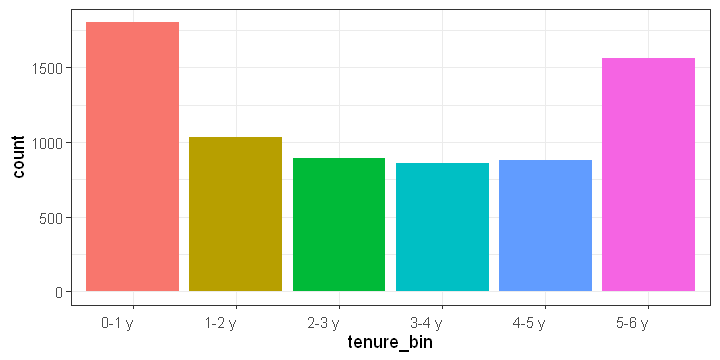

In [161]:
options(repr.plot.width =6, repr.plot.height = 3)
ggplot(telco, aes(tenure_bin, fill = tenure_bin)) + geom_bar()+ theme1

In [162]:
telco_cat <- telco[,-c(1,6,19,20)]
dummy<- data.frame(sapply(telco_cat,function(x) data.frame(model.matrix(~x-1,data =telco_cat))[,-1]))
head(dummy)

gender SeniorCitizen Partner Dependents PhoneService MultipleLines
1 0      0             1       0          0            0            
2 1      0             0       0          1            0            
3 1      0             0       0          1            0            
4 1      0             0       0          0            0            
5 0      0             0       0          1            0            
6 0      0             0       0          1            1            
  InternetService.xFiber.optic InternetService.xNo OnlineSecurity OnlineBackup
1 0                            0                   0              1           
2 0                            0                   1              0           
3 0                            0                   1              1           
4 0                            0                   1              0           
5 1                            0                   0              0           
6 1                            0                   0              0           
  ... PaperlessBilling PaymentMethod.xCredit.card..automatic.
1 ... 1                0                                     
2 ... 0                0                                     
3 ... 1                0                                     
4 ... 0                0                                     
5 ... 1                0                                     
6 ... 1                0                                     
  PaymentMethod.xElectronic.check PaymentMethod.xMailed.check Churn
1 1                               0                           0    
2 0                               1                           0    
3 0                               1                           1    
4 0                               0                           0    
5 1                               0                           1    
6 1                               0                           1    
  tenure_bin.x1.2.y tenure_bin.x2.3.y tenure_bin.x3.4.y tenure_bin.x4.5.y
1 0                 0                 0                 0                
2 0                 1                 0                 0                
3 0                 0                 0                 0                
4 0                 0                 1                 0                
5 0                 0                 0                 0                
6 0                 0                 0                 0                
  tenure_bin.x5.6.y
1 0                
2 0                
3 0                
4 0                
5 0                
6 1

In [163]:
telco_final <- cbind(telco_int,dummy)
head(telco_final)

tenure     MonthlyCharges TotalCharges gender SeniorCitizen Partner
1 -1.4265167 -0.72343522    -0.4019004   0      0             1      
2 -0.2973877  0.03883410    -0.9528702   1      0             0      
3 -0.9665012 -0.09429463    -1.6470178   1      0             0      
4  0.2044474 -0.45717777    -0.9878692   1      0             0      
5 -0.9665012  0.53484596    -1.2397562   0      0             0      
6  1.5008548  1.70509041     1.5066078   0      0             0      
  Dependents PhoneService MultipleLines InternetService.xFiber.optic ...
1 0          0            0             0                            ...
2 0          1            0             0                            ...
3 0          1            0             0                            ...
4 0          0            0             0                            ...
5 0          1            0             1                            ...
6 0          1            1             1                            ...
  PaperlessBilling PaymentMethod.xCredit.card..automatic.
1 1                0                                     
2 0                0                                     
3 1                0                                     
4 0                0                                     
5 1                0                                     
6 1                0                                     
  PaymentMethod.xElectronic.check PaymentMethod.xMailed.check Churn
1 1                               0                           0    
2 0                               1                           0    
3 0                               1                           1    
4 0                               0                           0    
5 1                               0                           1    
6 1                               0                           1    
  tenure_bin.x1.2.y tenure_bin.x2.3.y tenure_bin.x3.4.y tenure_bin.x4.5.y
1 0                 0                 0                 0                
2 0                 1                 0                 0                
3 0                 0                 0                 0                
4 0                 0                 1                 0                
5 0                 0                 0                 0                
6 0                 0                 0                 0                
  tenure_bin.x5.6.y
1 0                
2 0                
3 0                
4 0                
5 0                
6 1

### Partición de la base de datos 

In [172]:
#Splitting the data
set.seed(123)
indices = sample.split(telco_final$Churn, SplitRatio = 0.7)
train = telco_final[indices,]
test = telco_final[!(indices),]

Modelo saturado 

In [173]:
modelo_1 = glm(Churn ~ ., data = train, family = "binomial")
summary(modelo_1)


Call:
glm(formula = Churn ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8374  -0.6872  -0.2824   0.7156   3.1783  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                            -0.84717    0.35821  -2.365 0.018029 *  
tenure                                 -0.47667    0.24990  -1.907 0.056458 .  
MonthlyCharges                         -0.12170    0.04551  -2.674 0.007495 ** 
TotalCharges                            0.04640    0.04463   1.040 0.298566    
gender                                 -0.03506    0.07697  -0.455 0.648764    
SeniorCitizen                           0.23644    0.09901   2.388 0.016939 *  
Partner                                -0.12961    0.09154  -1.416 0.156814    
Dependents                             -0.12985    0.10844  -1.197 0.231123    
PhoneService                           -0.18487    0.15464  -1.196 0.231883    
Mult

Pequeño atajo en lma búsqueda de un buen modelo 

In [174]:
modelo_2<- stepAIC(modelo_1, direction="both")

Start:  AIC=4191.82
Churn ~ tenure + MonthlyCharges + TotalCharges + gender + SeniorCitizen + 
    Partner + Dependents + PhoneService + MultipleLines + InternetService.xFiber.optic + 
    InternetService.xNo + OnlineSecurity + OnlineBackup + DeviceProtection + 
    TechSupport + StreamingTV + StreamingMovies + Contract.xOne.year + 
    Contract.xTwo.year + PaperlessBilling + PaymentMethod.xCredit.card..automatic. + 
    PaymentMethod.xElectronic.check + PaymentMethod.xMailed.check + 
    tenure_bin.x1.2.y + tenure_bin.x2.3.y + tenure_bin.x3.4.y + 
    tenure_bin.x4.5.y + tenure_bin.x5.6.y

                                         Df Deviance    AIC
- tenure_bin.x3.4.y                       1   4133.8 4189.8
- MultipleLines                           1   4133.8 4189.8
- tenure_bin.x4.5.y                       1   4133.9 4189.9
- tenure_bin.x2.3.y                       1   4133.9 4189.9
- PaymentMethod.xCredit.card..automatic.  1   4133.9 4189.9
- gender                                  


Step:  AIC=4184.05
Churn ~ tenure + MonthlyCharges + TotalCharges + gender + SeniorCitizen + 
    Partner + Dependents + PhoneService + InternetService.xFiber.optic + 
    InternetService.xNo + OnlineSecurity + OnlineBackup + DeviceProtection + 
    TechSupport + StreamingTV + StreamingMovies + Contract.xOne.year + 
    Contract.xTwo.year + PaperlessBilling + PaymentMethod.xElectronic.check + 
    PaymentMethod.xMailed.check + tenure_bin.x1.2.y + tenure_bin.x2.3.y + 
    tenure_bin.x5.6.y

                                         Df Deviance    AIC
- gender                                  1   4134.3 4182.3
- tenure_bin.x2.3.y                       1   4134.8 4182.8
- TotalCharges                            1   4135.2 4183.2
- PhoneService                            1   4135.5 4183.5
- StreamingMovies                         1   4135.5 4183.5
- Dependents                              1   4135.5 4183.5
- Partner                                 1   4136.0 4184.0
<none>                  


Step:  AIC=4179.82
Churn ~ tenure + MonthlyCharges + SeniorCitizen + Partner + Dependents + 
    InternetService.xFiber.optic + InternetService.xNo + OnlineSecurity + 
    OnlineBackup + DeviceProtection + TechSupport + StreamingTV + 
    StreamingMovies + Contract.xOne.year + Contract.xTwo.year + 
    PaperlessBilling + PaymentMethod.xElectronic.check + PaymentMethod.xMailed.check + 
    tenure_bin.x1.2.y + tenure_bin.x5.6.y

                                         Df Deviance    AIC
- Dependents                              1   4139.4 4179.4
- StreamingMovies                         1   4139.5 4179.5
- Partner                                 1   4139.7 4179.7
<none>                                        4137.8 4179.8
- PaymentMethod.xMailed.check             1   4140.0 4180.0
- DeviceProtection                        1   4140.3 4180.3
+ TotalCharges                            1   4136.5 4180.5
+ PhoneService                            1   4136.5 4180.5
+ tenure_bin.x2.3.y         

In [177]:
summary(modelo_2)


Call:
glm(formula = Churn ~ tenure + MonthlyCharges + SeniorCitizen + 
    Partner + InternetService.xFiber.optic + InternetService.xNo + 
    OnlineSecurity + OnlineBackup + DeviceProtection + TechSupport + 
    StreamingTV + Contract.xOne.year + Contract.xTwo.year + PaperlessBilling + 
    PaymentMethod.xElectronic.check + tenure_bin.x1.2.y + tenure_bin.x5.6.y, 
    family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8219  -0.6956  -0.2849   0.7291   3.1348  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -0.91679    0.12132  -7.557 4.12e-14 ***
tenure                          -0.44998    0.06135  -7.334 2.23e-13 ***
MonthlyCharges                  -0.14712    0.04436  -3.317 0.000911 ***
SeniorCitizen                    0.26322    0.09668   2.723 0.006479 ** 
Partner                         -0.18114    0.08198  -2.210 0.027129 *  
InternetService.xFiber.opt

Podemos utilizar el factor de inflación de la varianza (vif) para eliminar los predictores redundantes o las variables que tienen una alta multicolinealidad entre ellos. La multicolinealidad existe cuando dos o más variables predictoras están muy relacionadas entre sí y luego se vuelve difícil entender el impacto de una variable independiente sobre la variable dependiente.

El factor de inflación de la varianza (VIF) se utiliza para medir la multicolinealidad entre las variables predictoras en un modelo. Un predictor que tiene un VIF de 2 o menos generalmente se considera seguro y se puede suponer que no está correlacionado con otras variables predictoras. Cuanto mayor sea el VIF, mayor es la correlación de la variable predictora con otras variables predictoras. Sin embargo, los predictores con un VIF alto pueden tener un valor p alto (o muy significativo), por lo tanto, necesitamos ver la importancia de la variable predictora antes de eliminarla de nuestro modelo.

In [178]:
vif(modelo_2)

tenure                  MonthlyCharges 
                       2.292290                        1.394658 
                  SeniorCitizen                         Partner 
                       1.075635                        1.087978 
   InternetService.xFiber.optic             InternetService.xNo 
                       1.538351                        1.547107 
                 OnlineSecurity                    OnlineBackup 
                       1.087088                        1.151668 
               DeviceProtection                     TechSupport 
                       1.242012                        1.152511 
                    StreamingTV              Contract.xOne.year 
                       1.326082                        1.222888 
             Contract.xTwo.year                PaperlessBilling 
                       1.223435                        1.111802 
PaymentMethod.xElectronic.check               tenure_bin.x1.2.y 
                       1.129124                        1.052060 
              tenure_bin.x5.6.y 
                       2.007943

In [180]:
model_3 <-glm(formula = Churn ~ tenure + MonthlyCharges + SeniorCitizen + 
    Partner + InternetService.xFiber.optic + InternetService.xNo + 
    OnlineSecurity + OnlineBackup + TechSupport + 
    StreamingTV + Contract.xOne.year + Contract.xTwo.year + PaperlessBilling + 
    PaymentMethod.xElectronic.check, family = "binomial", data = train)
summary(model_3)
vif(model_3)


Call:
glm(formula = Churn ~ tenure + MonthlyCharges + SeniorCitizen + 
    Partner + InternetService.xFiber.optic + InternetService.xNo + 
    OnlineSecurity + OnlineBackup + TechSupport + StreamingTV + 
    Contract.xOne.year + Contract.xTwo.year + PaperlessBilling + 
    PaymentMethod.xElectronic.check, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7429  -0.6980  -0.2906   0.7784   3.1119  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -0.88125    0.11173  -7.887 3.09e-15 ***
tenure                          -0.30512    0.04587  -6.652 2.89e-11 ***
MonthlyCharges                  -0.15339    0.04394  -3.490 0.000482 ***
SeniorCitizen                    0.26461    0.09636   2.746 0.006030 ** 
Partner                         -0.21543    0.08124  -2.652 0.008005 ** 
InternetService.xFiber.optic     0.80130    0.09589   8.357  < 2e-16 ***
InternetService.x

tenure                  MonthlyCharges 
                       1.250048                        1.367630 
                  SeniorCitizen                         Partner 
                       1.075532                        1.074901 
   InternetService.xFiber.optic             InternetService.xNo 
                       1.522299                        1.512147 
                 OnlineSecurity                    OnlineBackup 
                       1.084820                        1.137994 
                    TechSupport                     StreamingTV 
                       1.138246                        1.280410 
             Contract.xOne.year              Contract.xTwo.year 
                       1.191174                        1.173673 
               PaperlessBilling PaymentMethod.xElectronic.check 
                       1.110057                        1.128382

In [184]:
final_model <- glm(formula = Churn ~ tenure + MonthlyCharges + SeniorCitizen + 
    Partner + InternetService.xFiber.optic + InternetService.xNo + 
    OnlineSecurity + OnlineBackup + TechSupport +  
    Contract.xOne.year + Contract.xTwo.year + PaperlessBilling + 
    PaymentMethod.xElectronic.check, family = "binomial", data = train)

summary(final_model)
vif(final_model)


Call:
glm(formula = Churn ~ tenure + MonthlyCharges + SeniorCitizen + 
    Partner + InternetService.xFiber.optic + InternetService.xNo + 
    OnlineSecurity + OnlineBackup + TechSupport + Contract.xOne.year + 
    Contract.xTwo.year + PaperlessBilling + PaymentMethod.xElectronic.check, 
    family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7750  -0.6942  -0.2926   0.7754   3.1397  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -0.86307    0.11114  -7.766 8.11e-15 ***
tenure                          -0.29877    0.04568  -6.541 6.13e-11 ***
MonthlyCharges                  -0.16409    0.04353  -3.770 0.000164 ***
SeniorCitizen                    0.26626    0.09631   2.765 0.005698 ** 
Partner                         -0.20955    0.08112  -2.583 0.009789 ** 
InternetService.xFiber.optic     0.83661    0.09403   8.898  < 2e-16 ***
InternetService.xNo            

tenure                  MonthlyCharges 
                       1.240367                        1.345702 
                  SeniorCitizen                         Partner 
                       1.075514                        1.072994 
   InternetService.xFiber.optic             InternetService.xNo 
                       1.464277                        1.477389 
                 OnlineSecurity                    OnlineBackup 
                       1.084804                        1.136784 
                    TechSupport              Contract.xOne.year 
                       1.131981                        1.163676 
             Contract.xTwo.year                PaperlessBilling 
                       1.164595                        1.097373 
PaymentMethod.xElectronic.check 
                       1.116706

### Evaluación del modelo 

In [185]:
pred <- predict(final_model, type = "response", newdata = test[,-24])
summary(pred)
validation$prob <- pred

# Usando 50% como punto de corte

pred_churn <- factor(ifelse(pred >= 0.50, "Yes", "No"))
actual_churn <- factor(ifelse(validation$Churn==1,"Yes","No"))
table(actual_churn,pred_churn)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005599 0.042597 0.194496 0.270029 0.485653 0.791937 

            pred_churn
actual_churn   No  Yes
         No  1352  197
         Yes  268  293

In [186]:
cutoff_churn <- factor(ifelse(pred >=0.50, "Yes", "No"))
conf_final <- confusionMatrix(cutoff_churn, actual_churn, positive = "Yes")
accuracy <- conf_final$overall[1]
sensitivity <- conf_final$byClass[1]
specificity <- conf_final$byClass[2]
accuracy
sensitivity
specificity

Accuracy 
0.7796209

Sensitivity 
  0.5222816

Specificity 
  0.8728212

In [188]:
perform_fn <- function(cutoff) 
{
  predicted_churn <- factor(ifelse(pred >= cutoff, "Yes", "No"))
  conf <- confusionMatrix(predicted_churn, actual_churn, positive = "Yes")
  accuray <- conf$overall[1]
  sensitivity <- conf$byClass[1]
  specificity <- conf$byClass[2]
  out <- t(as.matrix(c(sensitivity, specificity, accuray))) 
  colnames(out) <- c("sensitivity", "specificity", "accuracy")
  return(out)
}

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005599 0.042597 0.194496 0.270029 0.485653 0.791937 

Warning message in confusionMatrix.default(predicted_churn, actual_churn, positive = "Yes"):
"Levels are not in the same order for reference and data. Refactoring data to match."
Warning message in confusionMatrix.default(predicted_churn, actual_churn, positive = "Yes"):
"Levels are not in the same order for reference and data. Refactoring data to match."


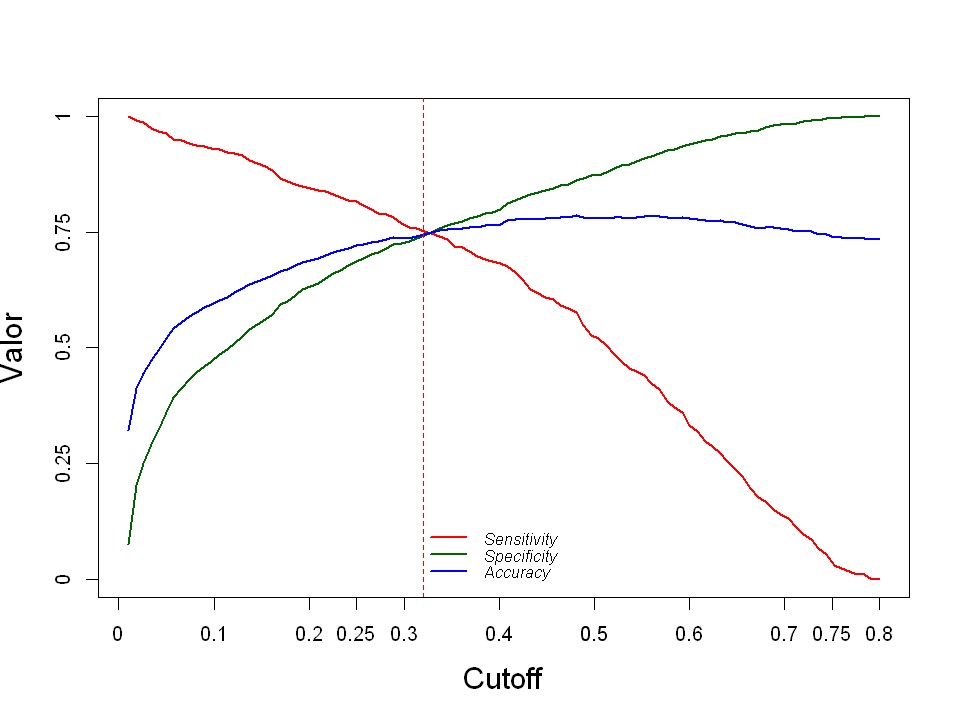

In [190]:
options(repr.plot.width =8, repr.plot.height =6)
summary(pred)
s = seq(0.01,0.80,length=100)
OUT = matrix(0,100,3)

for(i in 1:100)
{
  OUT[i,] = perform_fn(s[i])
} 

plot(s, OUT[,1],xlab="Cutoff",ylab="Valor",cex.lab=1.5,cex.axis=1.5,ylim=c(0,1),
     type="l",lwd=2,axes=FALSE,col=2)
axis(1,seq(0,1,length=5),seq(0,1,length=5),cex.lab=1.5)
axis(2,seq(0,1,length=5),seq(0,1,length=5),cex.lab=1.5)
lines(s,OUT[,2],col="darkgreen",lwd=2)
lines(s,OUT[,3],col=4,lwd=2)
box()
legend("bottom",col=c(2,"darkgreen",4,"darkred"),text.font =3,inset = 0.02,
       box.lty=0,cex = 0.8, 
       lwd=c(2,2,2,2),c("Sensitivity","Specificity","Accuracy"))
abline(v = 0.32, col="red", lwd=1, lty=2)
axis(1, at = seq(0.1, 1, by = 0.1))


Finalmente, curva ROC 

Setting levels: control = 0, case = 1

Setting direction: controls < cases



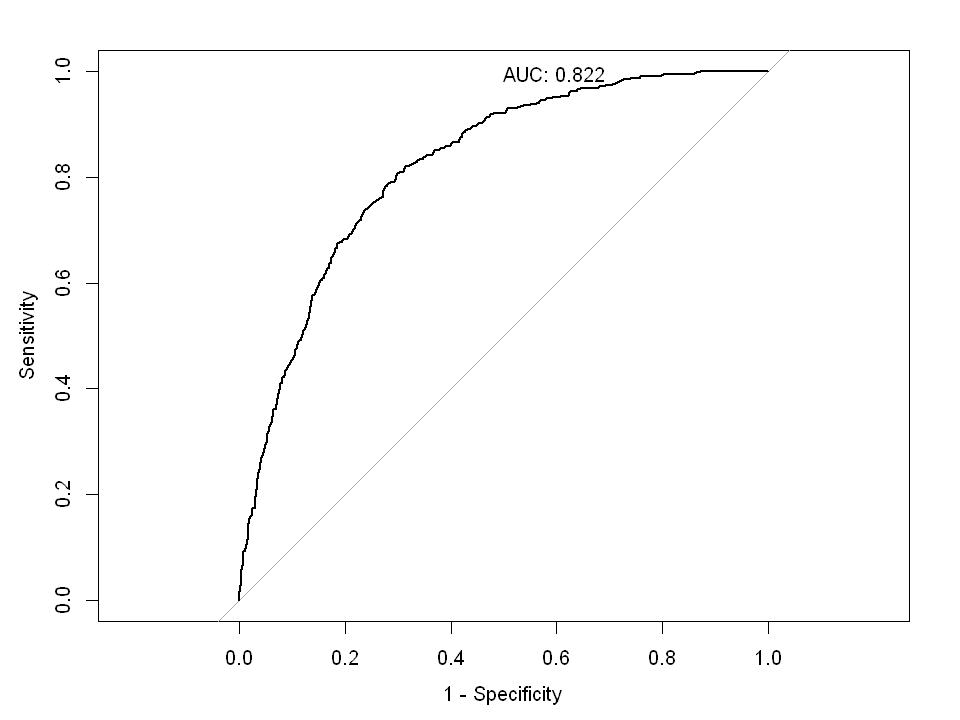

In [193]:
glm.roc <- roc(response = test$Churn, predictor = as.numeric(pred))
plot(glm.roc,      legacy.axes = TRUE, print.auc.y = 1.0, print.auc = TRUE)